# Trending YouTube Videos

In [306]:
import numpy as np
import pandas as pd
import datetime
from pandas.io.json import json_normalize
import seaborn as sns
from wordcloud import WordCloud
import nltk
import json
import warnings
from IPython.lib.display import YouTubeVideo
import re
from IPython.core.display import display, HTML
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib as mtpl
import matplotlib.pylab as pylab
from matplotlib import cm
import math
from scipy.stats import normaltest
from scipy.stats import normaltest, ttest_1samp, ttest_ind, norm, kstest

In [138]:
pd.set_option('display.max_colwidth', -1) #for all data of df to be seen
pd.options.display.max_columns = 999

In [2]:
# HTML('''<script> code_shown=true;function code_toggle() {if (code_shown){$('div.input').hide();$('#toggleButton').val('Show Code')} else {$('div.input').show();$('#toggleButton').val('Hide Code')}code_shown = !code_shown}$( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" id="toggleButton"></form>''')

<img src="https://cdn.vox-cdn.com/thumbor/SfyqZw6l_jidAYdkqYEis-Omdho=/0x0:1680x1050/1200x675/filters:focal(706x391:974x659):no_upscale()/cdn.vox-cdn.com/uploads/chorus_image/image/56414327/YTLogo_old_new_animation.0.gif" width="600" height="240" align="center"/>

YouTube is an American video-sharing website headquartered in San Bruno, California. The service was created by three former PayPal employees—Chad Hurley, Steve Chen, and Jawed Karim—in February 2005. Google bought the site in November 2006 for US$1.65 billion; YouTube now operates as one of Google's subsidiaries.
YouTube allows users to upload, view, rate, share, add to favourites, report, comment on videos, and subscribe to other users. It offers a wide variety of user-generated and corporate media videos. Available content includes video clips, TV show clips, music videos, short and documentary films, audio recordings, movie trailers, live streams, and other content such as video blogging, short original videos, and educational videos. Most of the content on YouTube is uploaded by individuals, but media corporations including CBS, the BBC, Vevo, and Hulu offer some of their material via YouTube as part of the YouTube partnership program. Unregistered users can only watch videos on the site, while registered users are permitted to upload an unlimited number of videos and add comments to videos. 



## Trending Videos



Although the most viewed videos were initially viral videos the most viewed videos were increasingly related to music videos. In fact, since recently every video that has reached the top of the "most viewed YouTube videos" list has been a music video. Although the most viewed videos are no longer listed on the site, reaching the top of the list is still considered a tremendous feat.
YouTube maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.



## The Datasets



2 datasets will be used for the purpose of this project, 2 sets of five files csv and JSON

One of the datasets used is a daily record of the top trending YouTube videos. The dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, and FR regions (USA, Great Britain, Germany, Canada, and France, respectively), with up to 200 listed trending videos per day.
Each region’s data is in a separate file. Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.

The second data set (JSON files) includes a category_id field and varies between regions. One such file is included for each of the five regions in the dataset.
.
The headers in the video files are:

•	video_id (Common id field to both comment and video csv files)

•	title

•	channel_title

•	category_id (Can be looked up using the included JSON files, but varies per region so use the appropriate JSON file for the CSV file's country)

•	tags (Separated by | character, [none] is displayed if there are no tags)

•	views

•	likes

•	dislikes

•	thumbnail_link

•	date (Formatted like so: [day].[month])


The headers in the comments file are:

•	video_id (Common id field to both comment and video csv files)

•	comment_text

•	likes

•	replies




## Data manipulation prosses 

In [3]:
# Upload Data
US_videos = pd.read_csv('USvideos.csv.zip')
US_videos_categories = pd.read_json('US_category_id.json')
CA_videos = pd.read_csv('CAvideos.csv.zip')
CA_videos_categories = pd.read_json('CA_category_id.json')
GB_videos = pd.read_csv('GBvideos.csv.zip')
GB_videos_categories = pd.read_json('GB_category_id.json')
FR_videos = pd.read_csv('FRvideos.csv.zip')
FR_videos_categories = pd.read_json('FR_category_id.json')
DE_videos = pd.read_csv('DEvideos.csv.zip')
DE_videos_categories = pd.read_json('DE_category_id.json')

In [4]:
#Create the video df
#df_videos = pd.concat([US_videos, CA_videos, GB_videos, FR_videos, DE_videos])
videos_list = [US_videos, CA_videos, GB_videos, FR_videos, DE_videos]
videos_all = pd.concat(videos_list, keys=['US', 'CA', 'GB', 'FR', 'DE'], names=['Country', 'Row ID'])

In [5]:
#Create the video categories df¶
#df_videos_categ = pd.concat([US_videos_categories, CA_videos_categories, GB_videos_categories,  FR_videos_categories, DE_videos_categories])
US_videos_categories['country'] = 'US'
GB_videos_categories['country'] = 'GB'
CA_videos_categories['country'] = 'CA'
FR_videos_categories['country'] = 'FR'
DE_videos_categories['country'] = 'DE'

df_videos_categ = pd.concat([US_videos_categories, 
                             CA_videos_categories, 
                             GB_videos_categories,  
                             FR_videos_categories, 
                             DE_videos_categories], keys=['US', 'CA', 'GB', 'FR', 'DE'])

#### Merging the data-sets
To create the full dataset the region’s data where uploaded and merged in one data frame. The files with the category information were uploaded and merged into another data set. The category id and category name where stored in a data frame the elements of witch were dictionaries. The column instead of pandas series where iteritems. As a result there were problems to treat the data since there was not a typical pandas series.
Below you can have a look of the category table.

In [6]:
df_videos_categ.head(1)

etag  \
US 0  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"   

                                                                                                                                                                                                                         items  \
US 0  {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}   

                                   kind country  
US 0  youtube#videoCategoryListResponse  US

After merging the two datasets the final data set craeted contains 142,000 rows and 30 columns 

#### Formatting
The dates columns were formatted to datetime. Also, the hour, day and month info was extracted. Also the views, comments, likes columns were changes to integers.

#### Data Cleaning
In order to make the nessesary change in format some rows had to be deleted since there was wrong information stored as date in some cases. 
Also after merging the two data frames non-available values were replaced with zeros.
Cases where there are 0 likes or comments and a lot of views i.e. the users has decided to disable those features have not been removed.

In [7]:
# df_videos=pd.merge(videos_all)
# df_videos_categ.reset_index(inplace=True)
# del df_videos_categ['index']

In [8]:
#df_videos_categ.info()

In [9]:
#df_videos_categ.iloc[1]

In [10]:
#type(df_videos_categ.items)

In [11]:
#df_videos_categ.items

In [12]:
#iteritems, 'function' object is not iterable, has to be trated as function 
for column_name, el in df_videos_categ.items():
    if column_name == 'items':
        category_df = json_normalize(el)[['id', 'snippet.title']]
category_df['country'] = list(df_videos_categ['country'])

In [13]:
#category_df['snippet.title'].unique()

In [14]:
#category_df[['snippet.title', 'id', 'country']].groupby(['snippet.title', 'id'])['country'].\
#count().reset_index().sort_values('id',ascending=True)

In [15]:
#category_df.head()

In [16]:
#category_df.info()

In [17]:
category_df['id']=category_df['id'].astype(int)

In [18]:
#category_df.info()

In [19]:
# Transform Puplish time in datetime format 

#videos_all['publish_time'][0]

In [20]:
# problem with some data errors='coerce' needed
videos_all['publish_time'] = pd.to_datetime(videos_all['publish_time'],  format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')

In [21]:
videos_all['publish_date'] = videos_all.publish_time.dt.date
videos_all['publish_month'] = videos_all.publish_time.dt.month
videos_all['publish_day'] = videos_all.publish_time.dt.day
videos_all['publish_hour'] = videos_all.publish_time.dt.hour

In [22]:
#videos_all.head(1)

In [23]:
# Transform Puplish time in datetime format 
# problem transforming the data in date format 

In [24]:
videos_all = videos_all[(videos_all['trending_date'] != '29441')].copy()

In [25]:
videos_all['trending_date'] = pd.to_datetime(videos_all['trending_date'], format='%y.%d.%m')

In [26]:
#videos_all.info()

In [27]:
#videos_all.head(1)

In [28]:
# Add category info to videos (join)

#category_df.head()

In [29]:
#videos_all.head(1)

In [30]:
df_videos=pd.merge(videos_all.reset_index(), category_df, left_on=['category_id', 'Country'], 
                   right_on=['id', 'country'], how='inner')

In [31]:
print(videos_all.shape)
print(category_df.shape)
print(df_videos.shape)

(142502, 20)
(156, 3)
(142095, 25)


In [32]:
#Add category info to videos (join)
df_videos.fillna(0, inplace=True)

In [33]:
df_videos.tags

0         SHANtell martin                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
1         cute|"cats"|"thai"|"eggs"                                                                                                                                                                                                                                                                                                                                                                                                                              

## Inspiration - Goal



Possible uses for this dataset could include:

Sentiment analysis in a variety of forms

Categorising YouTube videos based on their comments and statistics.

Training ML algorithms to generate their own YouTube comments.

Analysing what factors affect how popular a YouTube video will be.

Analysis of changes over time etc



## Data Exploration



#### Most popular videos of all countries (in views)


In [34]:
df_videos.likes = pd.to_numeric(df_videos.likes, errors='coerse')

tmp = pd.to_numeric(df_videos.views, errors='coerse').copy()
del df_videos['views']
df_videos['views'] = tmp.copy()

df_videos.comment_count = pd.to_numeric(df_videos.comment_count, errors='coerse')
df_videos.dislikes = pd.to_numeric(df_videos.dislikes, errors='coerse')

In [35]:
table1 = df_videos.groupby('country')[['likes', 'views', 'comment_count', 'dislikes']].sum()    

In [36]:
round(table1 / 1000000)

likes     views  comment_count  dislikes
country                                           
CA       1079.0  31315.0   135.0          56.0    
DE       551.0   15501.0   69.0           34.0    
FR       448.0   10615.0   44.0           20.0    
GB       3011.0  131436.0  306.0          191.0   
US       1423.0  41227.0   175.0          79.0

In [37]:
sort_by = 'views'
thump = df_videos.groupby(['title', 'thumbnail_link'])[['likes', 'views', 'comment_count', 'dislikes']].sum().\
    sort_values(sort_by, ascending=False)
    
video_id = [jpg[1] for jpg in thump.index]
video_id = [re.search('.*/(.*)/default.*', i).group(1) for i in video_id[:len(video_id)-1]]

def youtube(video_ids, width=300, height=200):
    frame = '<td><iframe width="{}" height="{}" src="https://www.youtube.com/embed/{}" frameborder="0" \
    allow="autoplay; encrypted-media" allowfullscreen></iframe></td>'
    iframes = []
    for vid in video_ids:
        iframes.append(frame.format(width, height, vid))
    frame = '<table><tr>{}</tr></table>'.format(''.join(iframes))
    return HTML(frame)


display(youtube([video_id[0], video_id[1], video_id[2]], width=250, height=300))
display(youtube([video_id[3], video_id[4], video_id[4]], width=250, height=300))
display(youtube([video_id[5], video_id[6], video_id[7]], width=250, height=300))

#### Most liked videos 

As we can see in the chart below there is a huge difference in number of likes among  the top 10 most liked videos! The likes of the third most popolular video interms of likes has half of the likes compared to the most liked video.

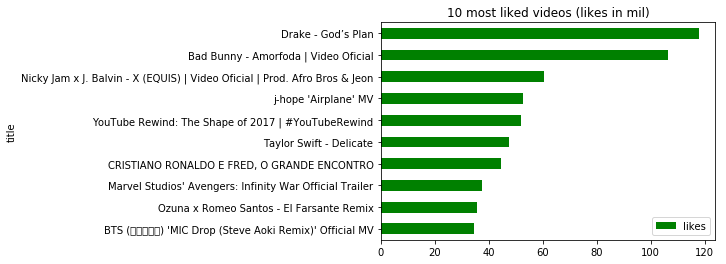

In [38]:
metrics = ['likes','views','comment_count','dislikes']
df_videos_title = df_videos.reset_index().groupby(['country', 'title'])[metrics].sum()
likes = df_videos_title.sort_values('likes',ascending=True)

likes['likes'] = likes.likes / 1000000
likes['comment_count'] = likes.comment_count / 1000000
likes['dislikes'] = likes.dislikes / 1000000
likes['views'] = likes.views / 1000000

likes.reset_index(inplace=True)
likes.tail(10).plot(kind='barh',x='title',y='likes',title= '10 most liked videos (likes in mil)', 
                    color='green', sort_columns=True)
plt.figure(figsize = (16,6))

plt.show();

#### Views, Likes, Comment Counts, Dislikes per Country

UK is the country with most likes, the most liked video has reached 120 mil likes, for the US the most liked video only has 25 mil likes. Annother interesting thing to mention is that the tenth video in likes has almost 1/4rth of videos compared to the most liked video for all countries, with the exeption of the US there the diff in likes among the firt 10 videos is not that big. Actually the tenth most liked video for the US has just halpf of the likes compared to the most liked one. 
Another interesting fact is that for every country there is one prominent disliked video and for the rest 9 videos the number of dislikes is close to 0mil.
Views and number of comments follow the same distribution aming the 10 first videos.

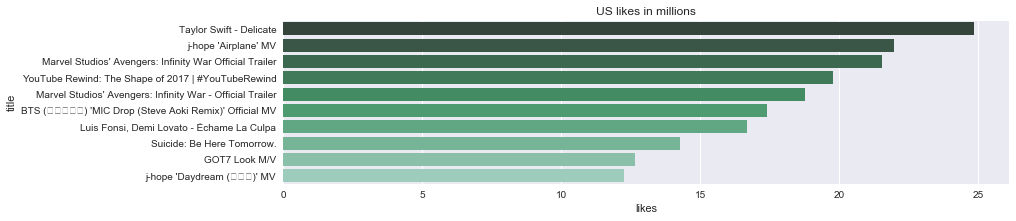

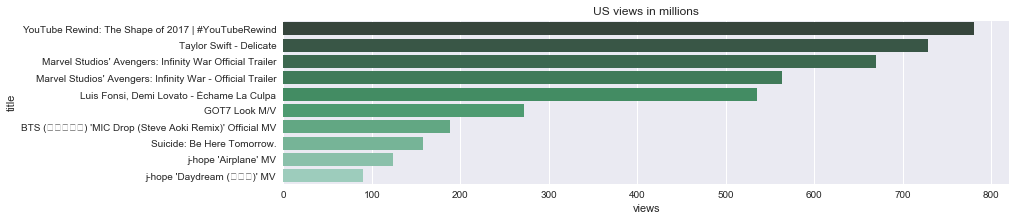

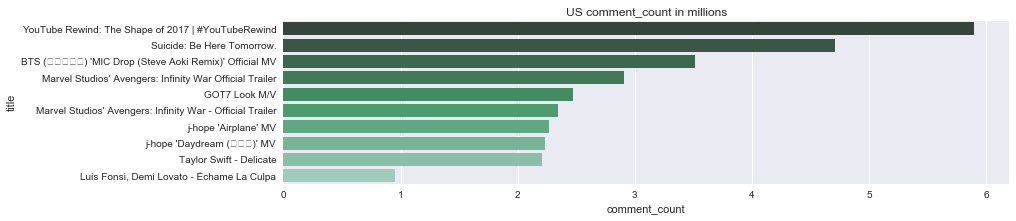

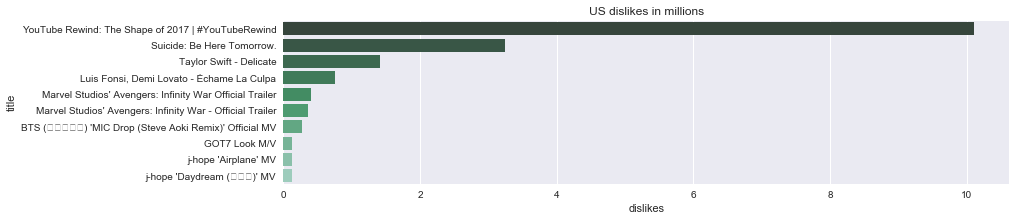

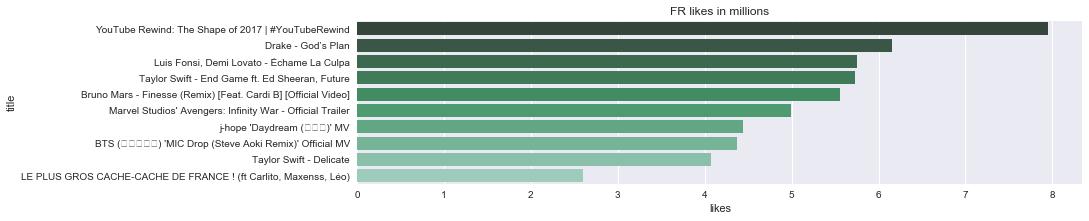

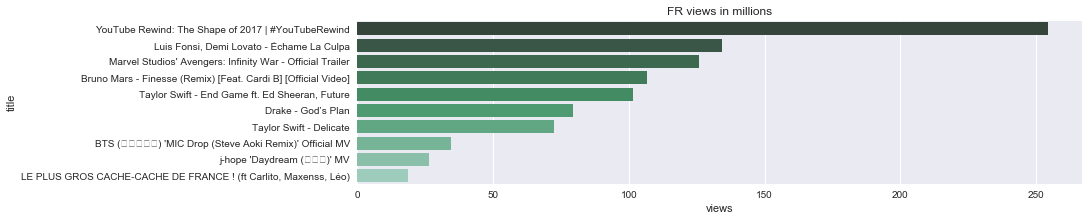

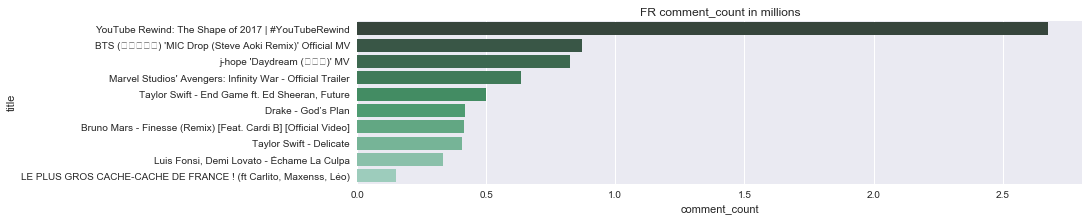

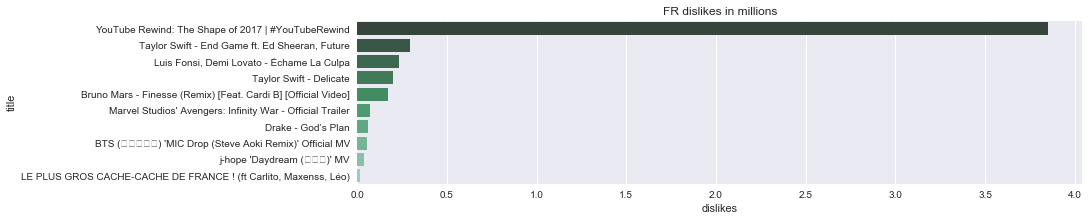

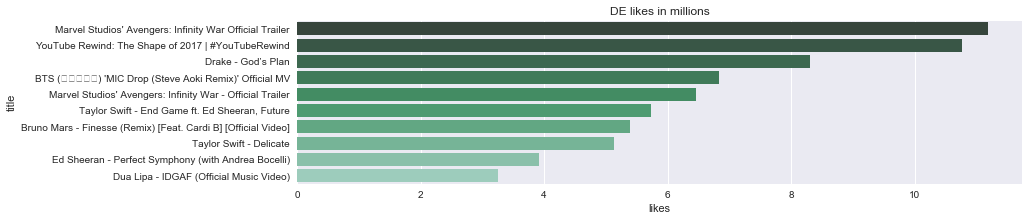

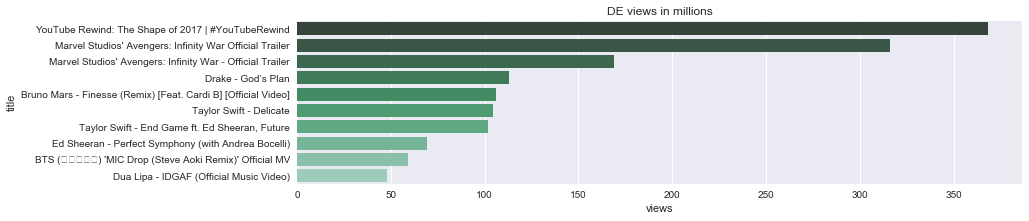

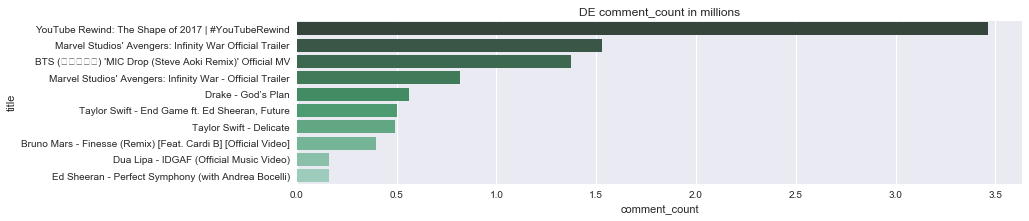

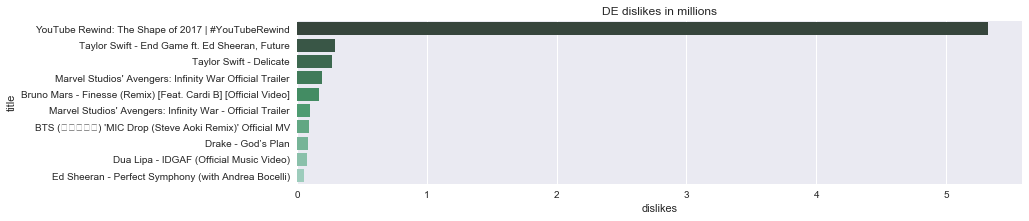

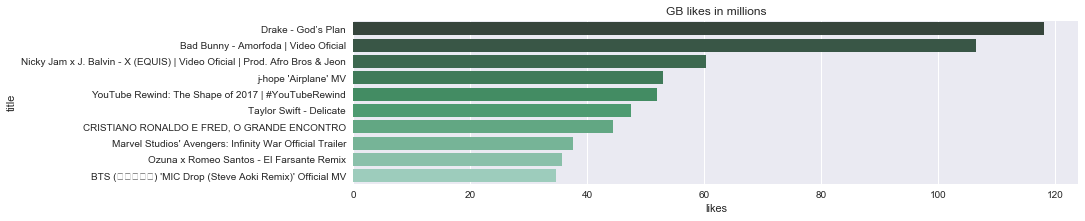

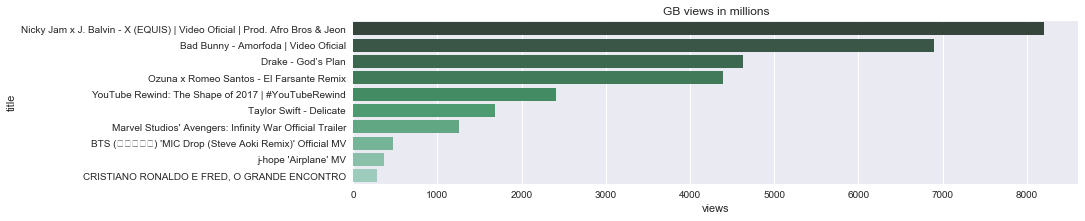

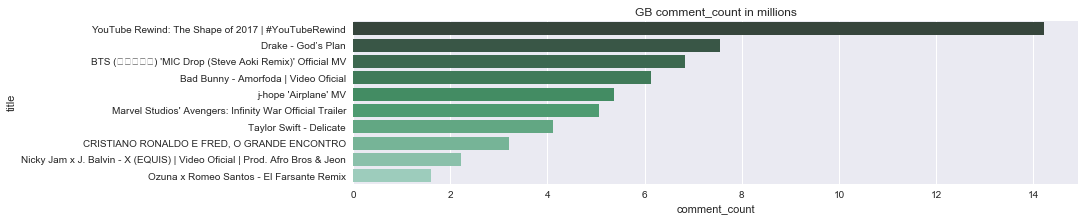

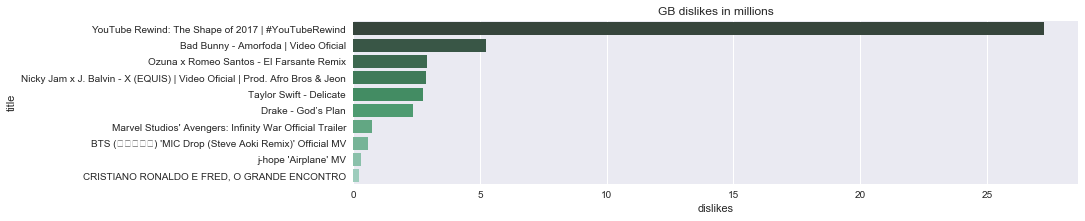

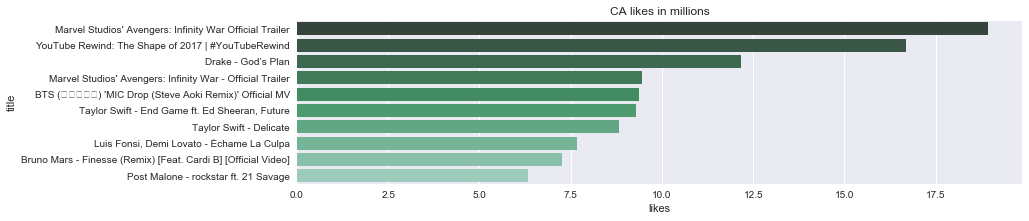

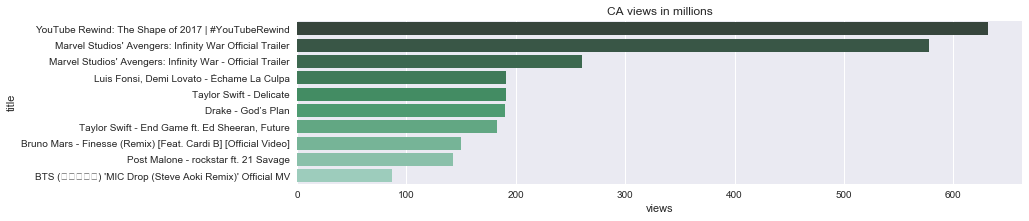

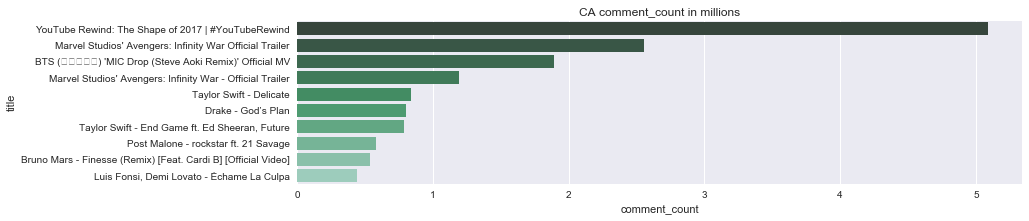

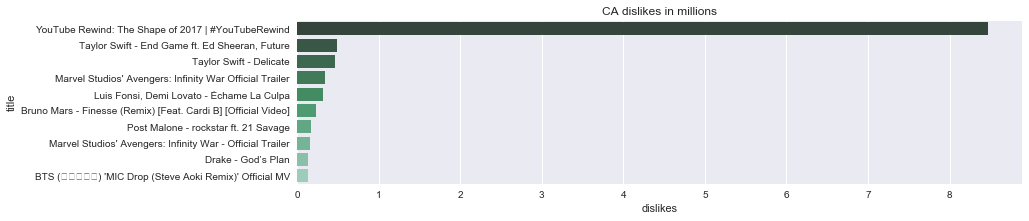

In [39]:
sns.set(rc={'figure.figsize':(13, 3)})
for cntry in likes.country.unique():
    for colm in ['likes', 'views', 'comment_count', 'dislikes']:
        ax = sns.barplot(data=likes.loc[likes.country == cntry, [colm, 'title']].tail(10).\
                     sort_values(colm, ascending=False), y='title',x=colm, 
                        palette="BuGn_d").set_title(cntry + ' ' + colm + ' in millions')
        plt.show()

#### likes per view, dislikes to views

In [40]:
likes['prc_likes'] = likes['likes'] / likes['views']
likes['prc_dislikes'] = likes['dislikes'] / likes['views']

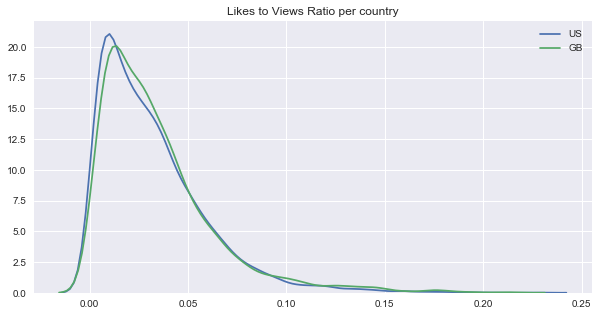

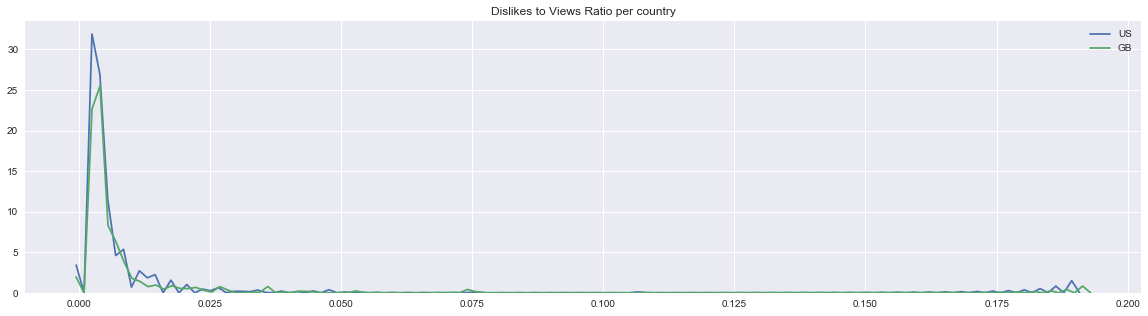

In [41]:
f = plt.figure(figsize=(10,5))

#ax = f.add_subplot(121)
sns.kdeplot(likes.loc[likes.country == 'US', 'prc_likes'], label='US')
sns.kdeplot(likes.loc[likes.country == 'GB', 'prc_likes'], label='GB')
#sns.kdeplot(likes.loc[likes.country == 'FR', 'prc_likes'], label='FR')
#sns.kdeplot(likes.loc[likes.country == 'DE', 'prc_likes'], label='DE')
#sns.kdeplot(likes.loc[likes.country == 'CA', 'prc_likes'], label='CA')
plt.title('Likes to Views Ratio per country')
plt.legend()
plt.show()

f = plt.figure(figsize=(20,5))
#ax2 = f.add_subplot(122)
sns.kdeplot(likes.loc[likes.country == 'US', 'prc_dislikes'], label='US')
sns.kdeplot(likes.loc[likes.country == 'GB', 'prc_dislikes'], label='GB')
#sns.kdeplot(likes.loc[likes.country == 'FR', 'prc_dislikes'], label='FR')
#sns.kdeplot(likes.loc[likes.country == 'DE', 'prc_dislikes'], label='DE')
#sns.kdeplot(likes.loc[likes.country == 'CA', 'prc_dislikes'], label='CA')
plt.legend()
plt.title('Dislikes to Views Ratio per country')
plt.show()

In [42]:
#df_videos.columns

In [43]:
df_videos['prc_likes'] = df_videos['likes'] / df_videos['views']
df_videos['prc_dislikes'] = df_videos['dislikes'] / df_videos['views']
df_videos['prc_comments'] = df_videos['comment_count'] / df_videos['views']

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


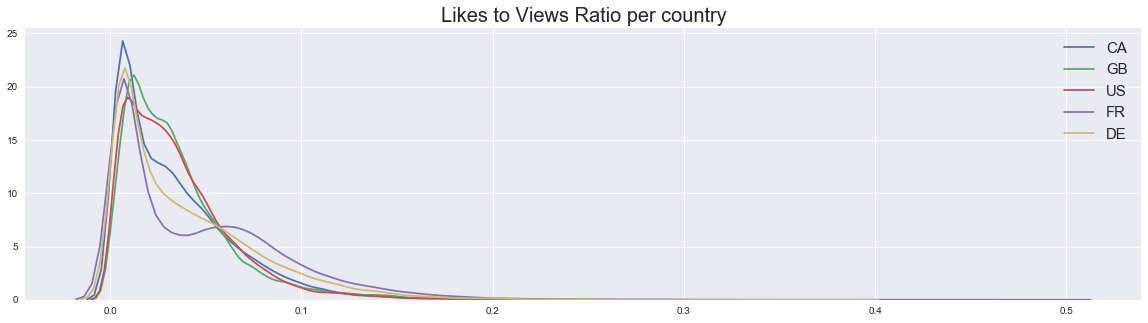

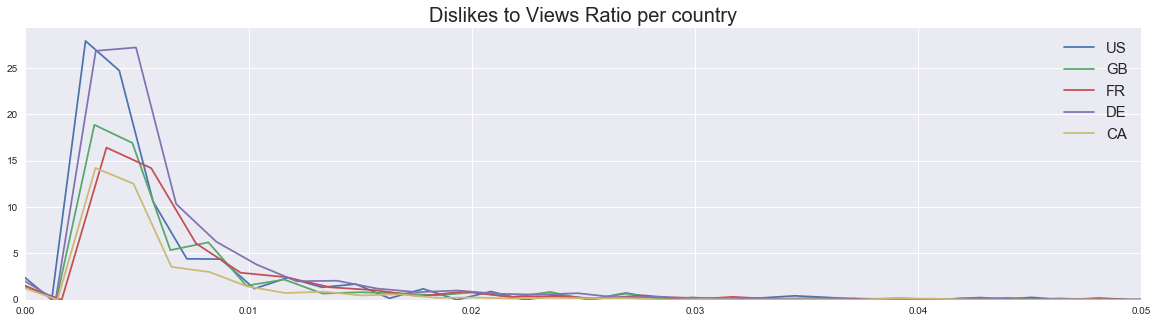

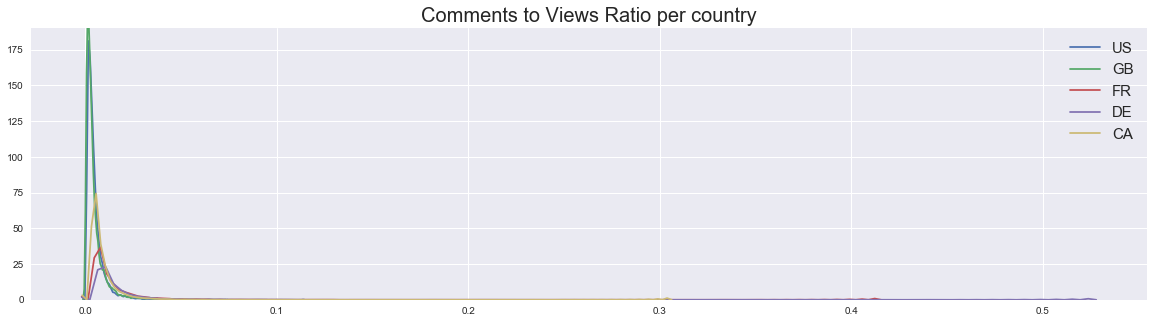

In [44]:


f = plt.figure(figsize=(20,5))

#ax = f.add_subplot(121)
sns.kdeplot(df_videos.loc[df_videos.country == 'CA', 'prc_likes'], label='CA')
sns.kdeplot(df_videos.loc[df_videos.country == 'GB', 'prc_likes'], label='GB')
sns.kdeplot(df_videos.loc[df_videos.country == 'US', 'prc_likes'], label='US')
sns.kdeplot(df_videos.loc[df_videos.country == 'FR', 'prc_likes'], label='FR')
sns.kdeplot(df_videos.loc[df_videos.country == 'DE', 'prc_likes'], label='DE')
plt.title('Likes to Views Ratio per country', fontsize=20)
plt.legend(fontsize=15)
plt.show()

f = plt.figure(figsize=(20,5))
#ax2 = f.add_subplot(122)
sns.kdeplot(df_videos.loc[df_videos.country == 'US', 'prc_dislikes'], label='US')
sns.kdeplot(df_videos.loc[df_videos.country == 'GB', 'prc_dislikes'], label='GB')
sns.kdeplot(df_videos.loc[df_videos.country == 'FR', 'prc_dislikes'], label='FR')
sns.kdeplot(df_videos.loc[df_videos.country == 'DE', 'prc_dislikes'], label='DE')
sns.kdeplot(df_videos.loc[df_videos.country == 'CA', 'prc_dislikes'], label='CA')
plt.xlim((0.000,0.05))
plt.legend(fontsize=15)
plt.title('Dislikes to Views Ratio per country', fontsize=20)
plt.show()

f = plt.figure(figsize=(20,5))
sns.kdeplot(df_videos.loc[df_videos.country == 'US', 'prc_comments'], label='US')
sns.kdeplot(df_videos.loc[df_videos.country == 'GB', 'prc_comments'], label='GB')
sns.kdeplot(df_videos.loc[df_videos.country == 'FR', 'prc_comments'], label='FR')
sns.kdeplot(df_videos.loc[df_videos.country == 'DE', 'prc_comments'], label='DE')
sns.kdeplot(df_videos.loc[df_videos.country == 'CA', 'prc_comments'], label='CA')
#plt.xlim((0.000,0.05))
plt.legend(fontsize=15)
plt.title('Comments to Views Ratio per country', fontsize=20)
#plt.rc('figure', titlesize=S_SIZE)

plt.show()

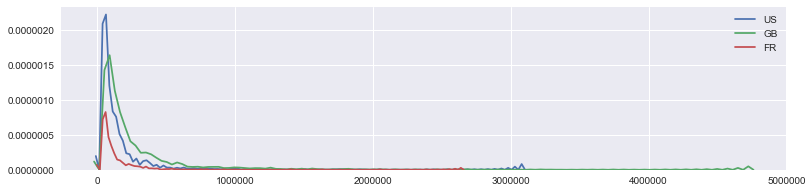

In [45]:
sns.kdeplot(df_videos.loc[df_videos.country == 'US', 'likes'], label='US')
sns.kdeplot(df_videos.loc[df_videos.country == 'GB', 'likes'], label='GB')
sns.kdeplot(df_videos.loc[df_videos.country == 'FR', 'likes'], label='FR')
plt.legend()
plt.show()

In [46]:
df_videos.head

<bound method NDFrame.head of        Country  Row ID     video_id trending_date  \
0       US      0       2kyS6SvSYSE 2017-11-14      
1       US      35      0mlNzVSJrT0 2017-11-14      
2       US      44      STI2fI7sKMo 2017-11-14      
3       US      54      KODzih-pYlU 2017-11-14      
4       US      66      8mhTWqWlQzU 2017-11-14      
5       US      85      pa_oUisZZy0 2017-11-14      
6       US      100     fCTKDn3Q8xQ 2017-11-14      
7       US      119     _dhneCO4YEE 2017-11-14      
8       US      120     EYkEshCOhEU 2017-11-14      
9       US      123     Eg_kW5fw6qU 2017-11-14      
10      US      138     6Detw08jRhs 2017-11-14      
11      US      154     P4YJwy_T9pM 2017-11-14      
12      US      180     1640fZpYBSY 2017-11-14      
13      US      182     7m630xvAJtA 2017-11-14      
14      US      191     6ixU_vdE0Es 2017-11-14      
15      US      192     wRGldR_SQAA 2017-11-14      
16      US      198     6hTzM1BPdU8 2017-11-14      
17      US      

#### Analysis per category, Users like videos from which category the most?

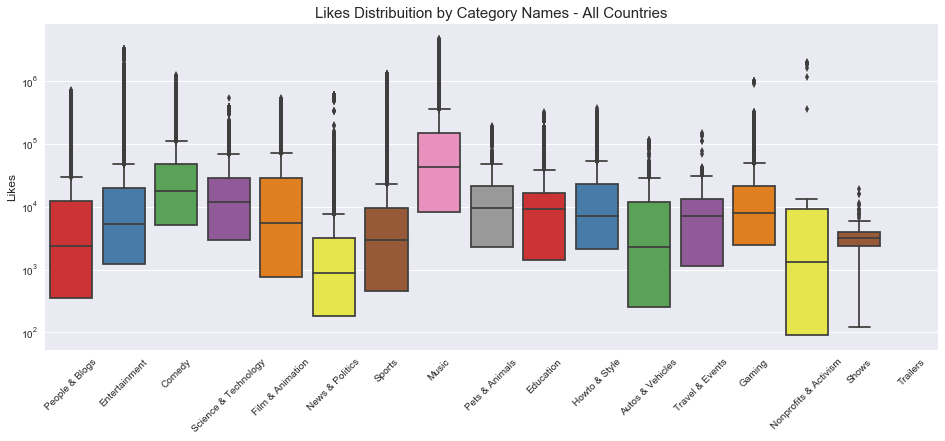

In [47]:
plt.figure(figsize = (16,6))

g = sns.boxplot(x='snippet.title', y='likes', data=df_videos, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names - All Countries", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes", fontsize=12)
g.set(yscale="log")
plt.show()

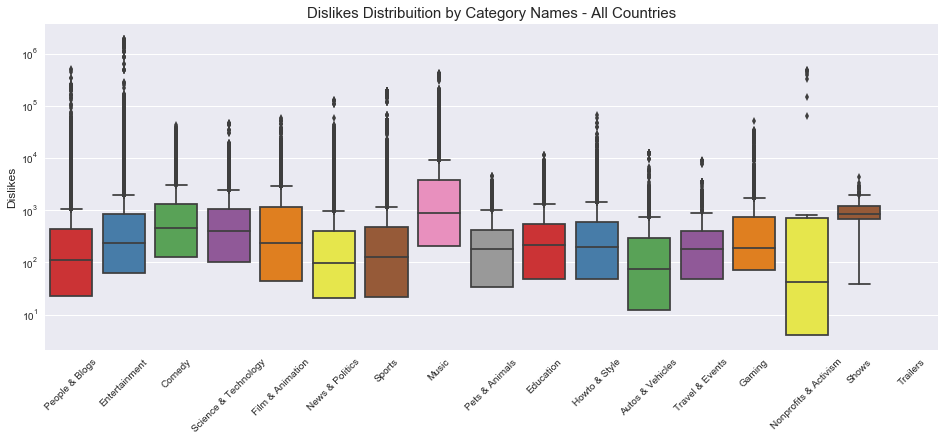

In [48]:
plt.figure(figsize = (16,6))

g = sns.boxplot(x='snippet.title', y='dislikes', data=df_videos, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes Distribuition by Category Names - All Countries", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes", fontsize=12)
g.set(yscale="log")
plt.show()

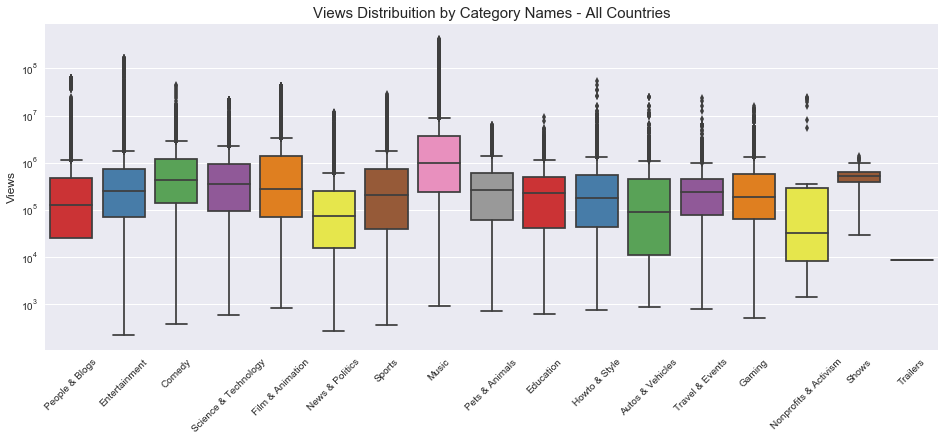

In [49]:
plt.figure(figsize = (16,6))

g = sns.boxplot(x='snippet.title', y='views', data=df_videos, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Views Distribuition by Category Names - All Countries", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Views", fontsize=12)
g.set(yscale="log")
plt.show()

Top category of all countries except GB is Entertainment.
Music's videos ranked insignificantly in Canada, Germany and France compare to US and UK.
Sport's videos are more popular in Canada, Germany and France.
All top 8 categories in United Kingdom entertainment-related, this might not be a good sign.
Show's and Activism's video get the bottom rank in all most countries.

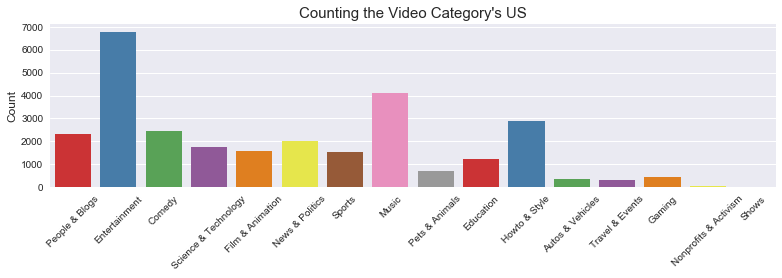

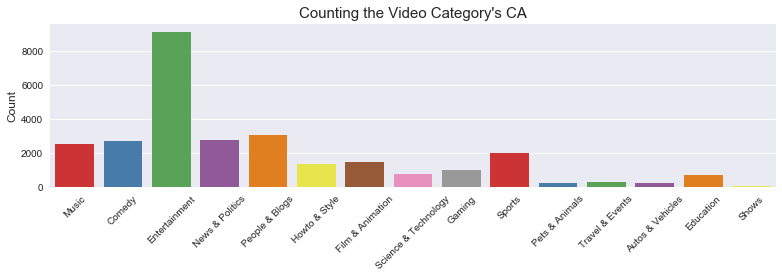

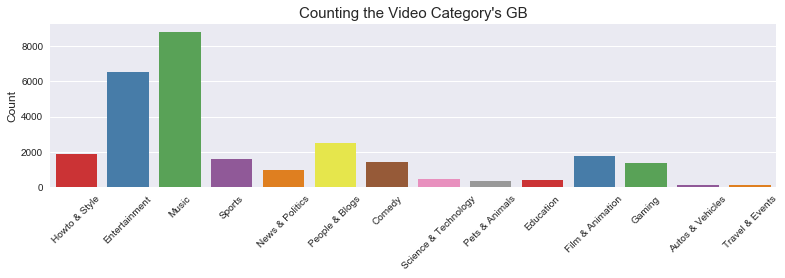

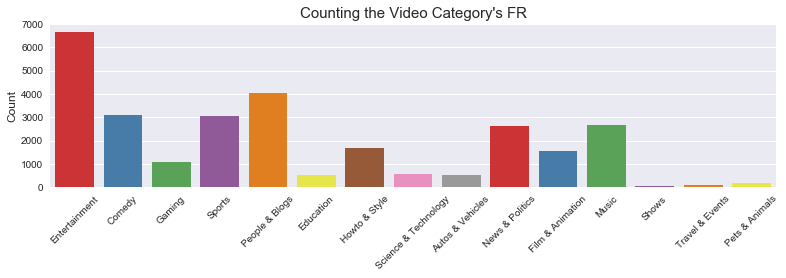

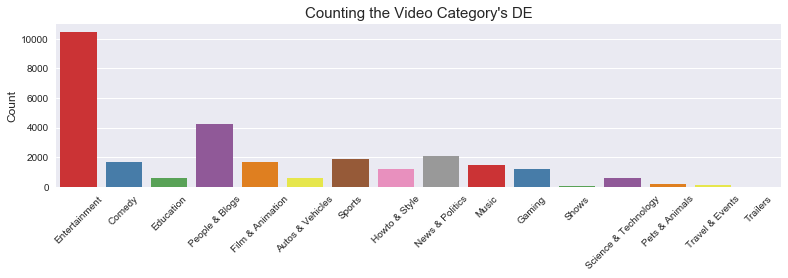

In [50]:
#print(df_videos['snippet.title'].value_counts()[:5])

for i in df_videos.country.unique():
    g = sns.countplot('snippet.title', data=df_videos[df_videos.country==i], palette="Set1")
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    g.set_title("Counting the Video Category's "+ i, fontsize=15)
    g.set_xlabel("", fontsize=12)
    g.set_ylabel("Count", fontsize=12)
   # plt.figure(figsize = (0,0))
    plt.show()

### Engagement ratios per category 

Pets & Animals videos have highest likes-dislikes ratio. Not suprisingly, people find difficult to hate pets and animals.
Nonprofit & Activism's videos have lowest likes-dislike ratio and views-comments ratio. People relatively hate these video and comment a lot.
Obviosly, people still prefer implicit feedback than explicit. The ratio of views to comments is so large that only a comment written for hundreds of views.

#### Likes-Dislikes Ratio

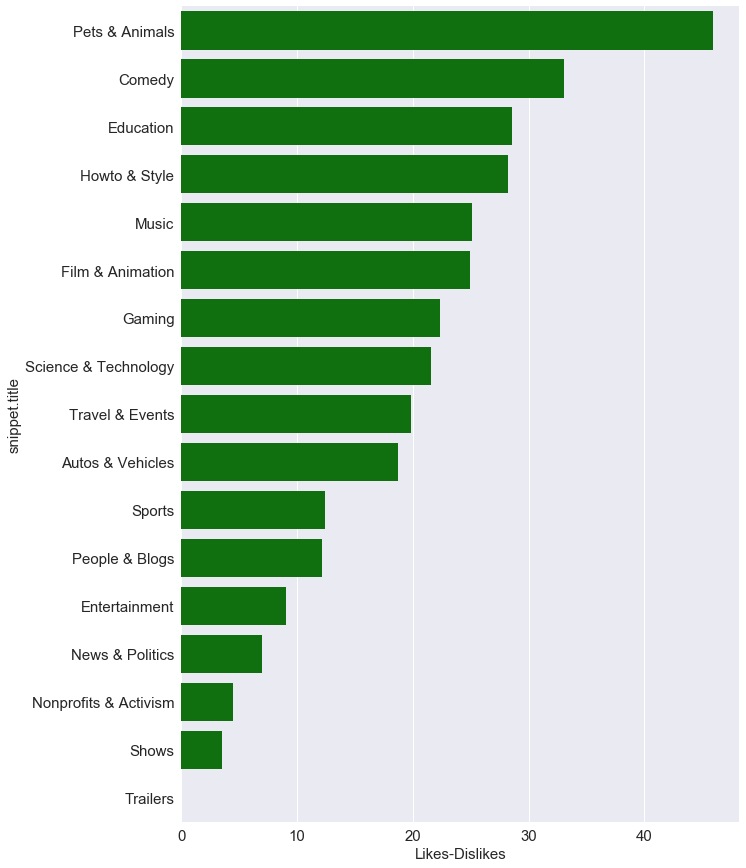

In [514]:
like_dislike_ratio = df_videos.groupby('snippet.title')['likes'].agg('sum') / df_videos.groupby('snippet.title')['dislikes'].agg('sum')
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['snippet.title','Likes-Dislikes']
plt.subplots(figsize=(10, 15))
sns.barplot(x='Likes-Dislikes', y='snippet.title', data=like_dislike_ratio, label='Likes-Dislikes Ratio', color="g")

plt.show()

#### Views-Comments Ratio

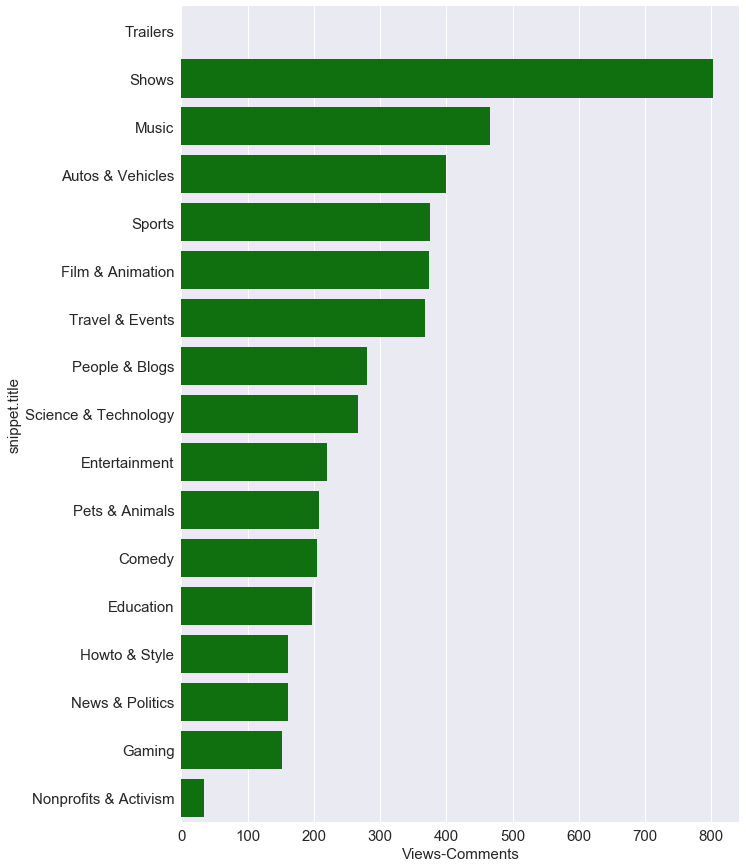

In [515]:
like_dislike_ratio = df_videos.groupby('snippet.title')['views'].agg('sum') / df_videos.groupby('snippet.title')['comment_count'].agg('sum')
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['snippet.title','Views-Comments']
plt.subplots(figsize=(10, 15))
sns.barplot(x='Views-Comments', y='snippet.title', data=like_dislike_ratio,label="Likes-Dislikes Ratio", color="g")

plt.show()

#### Dislikes-Views Ratio

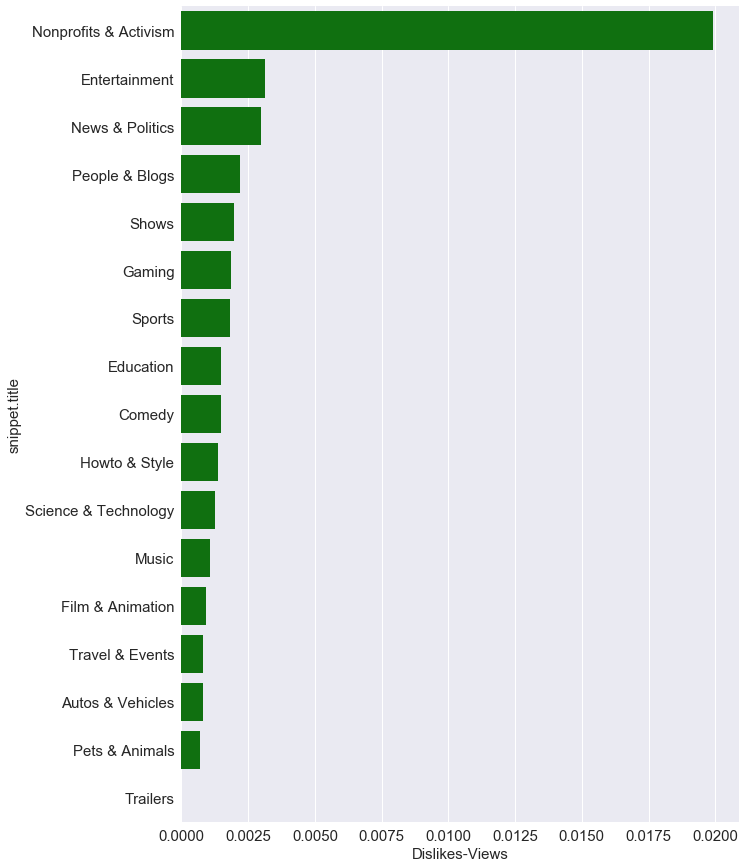

In [516]:
like_dislike_ratio = df_videos.groupby('snippet.title')['dislikes'].agg('sum') / df_videos.groupby('snippet.title')['views'].agg('sum')
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['snippet.title','Dislikes-Views']
plt.subplots(figsize=(10, 15))
sns.barplot(x='Dislikes-Views', y='snippet.title', data=like_dislike_ratio,label="Likes-Dislikes Ratio", color="g")

plt.show()

#### Likes-Views Ratio

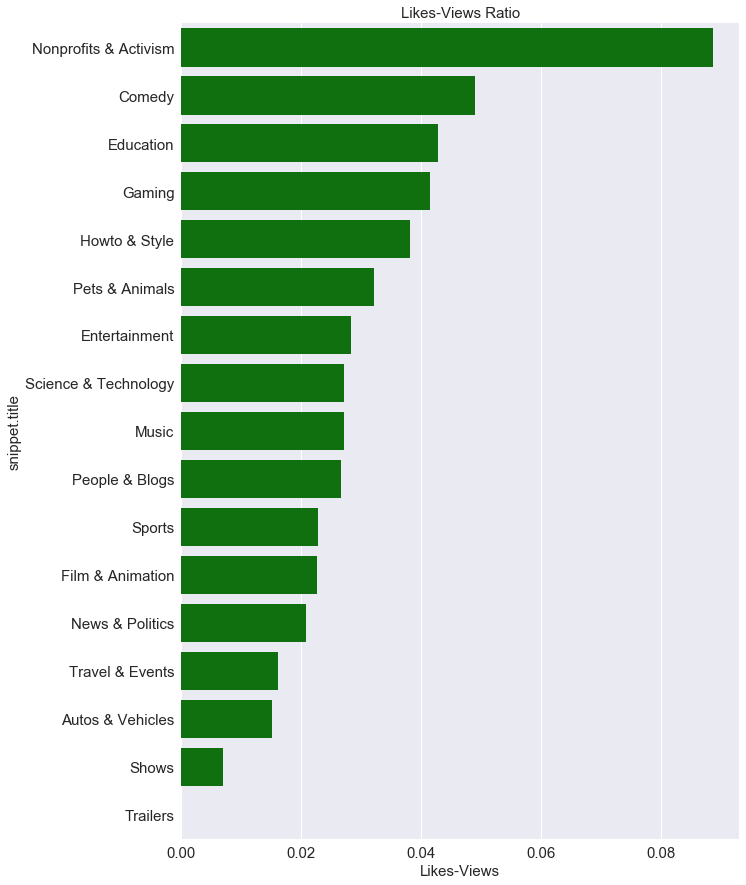

In [517]:
like_dislike_ratio = df_videos.groupby('snippet.title')['likes'].agg('sum') / df_videos.groupby('snippet.title')['views'].agg('sum')
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['snippet.title','Likes-Views']
plt.subplots(figsize=(10, 15))
sns.barplot(x='Likes-Views', y='snippet.title', data=like_dislike_ratio,  color="g").set_title('Likes-Views Ratio')

plt.show()

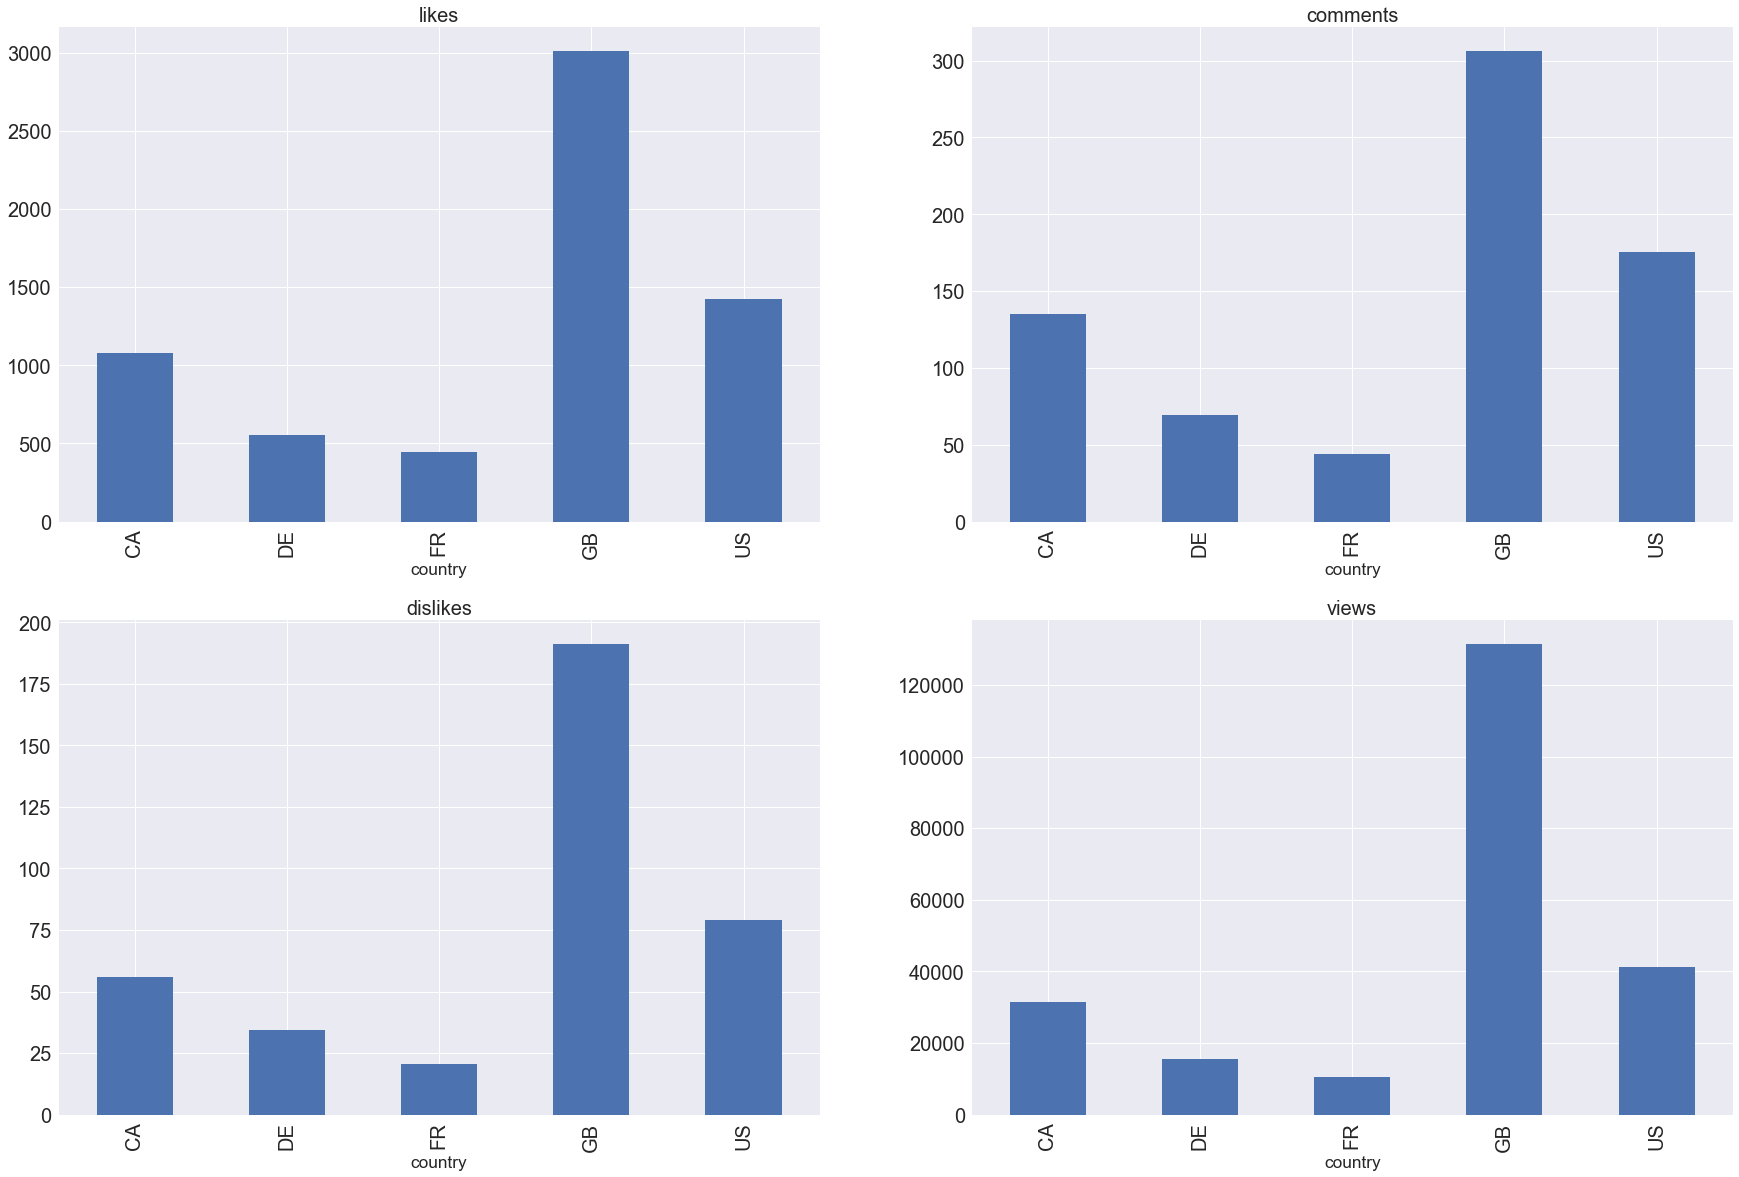

In [55]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'20',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


metrics = ['likes','views','comment_count','dislikes']
df_videos_country = df_videos.reset_index().groupby(['country'])[metrics].sum()

fig = plt.figure(figsize=(30, 20))


ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

df_videos_country ['likes'] = df_videos_country.likes / 1000000
df_videos_country ['comment_count'] = df_videos_country.comment_count / 1000000
df_videos_country ['dislikes'] = df_videos_country.dislikes / 1000000
df_videos_country ['views'] = df_videos_country.views / 1000000

df_videos_country['likes'].plot(kind='bar',title='likes',ax=ax1, fontsize=20)
df_videos_country['comment_count'].plot(kind='bar',title='comments',ax=ax2, fontsize=20)
df_videos_country['dislikes'].plot(kind='bar',title='dislikes',ax=ax3, fontsize=20)
df_videos_country['views'].plot(kind='bar',title='views',ax=ax4, fontsize=20)

plt.show()

### How many likes, dislikes, views and comments get different countries?

Obviously, four of the graphs share the similar trend in numbers. One possible reason to this is due to the video's trending duration. Enduring trending videos have the advantages in getting more views, likes, dislikes and comments.

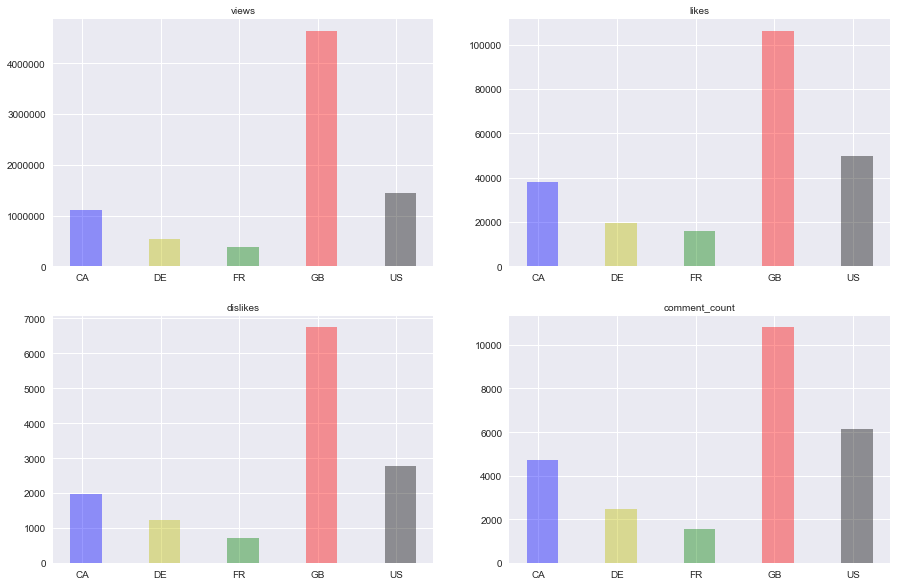

In [56]:
params = {'legend.fontsize': '10',
          'figure.figsize': (15, 5),
         'axes.labelsize': '10',
         'axes.titlesize':'10',
         'xtick.labelsize':'10',
         'ytick.labelsize':'10'}
pylab.rcParams.update(params)

country_list = df_videos.groupby(['country']).count().index

to_int = ['views', 'likes', 'dislikes', 'comment_count']
for column in to_int:
    df_videos[column] = df_videos[column].astype(int)
    
measures = list()
n_groups = len(country_list)
for i, typ in enumerate(to_int):
    measure = list()
    for c in country_list:
        measure.append( df_videos[ df_videos['country']==c][typ].agg('sum')/len( df_videos[ df_videos['country']==c].index.unique()))
    measures.append(measure)

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2,nrows=2, figsize=(15,10))

index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.4
error_config = {'ecolor': '0.3'}

for i, axs in enumerate([[ax1, ax2], [ax3, ax4]]):
    for j, ax in enumerate(axs):
        ax.bar(index + (bar_width), measures[(i+j)+i], bar_width*4,
                alpha=opacity, color=['b','y','g','r','k'],
                error_kw=error_config)
        ax.set_title(to_int[(i+j)+i])
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(country_list)
        
plt.show()

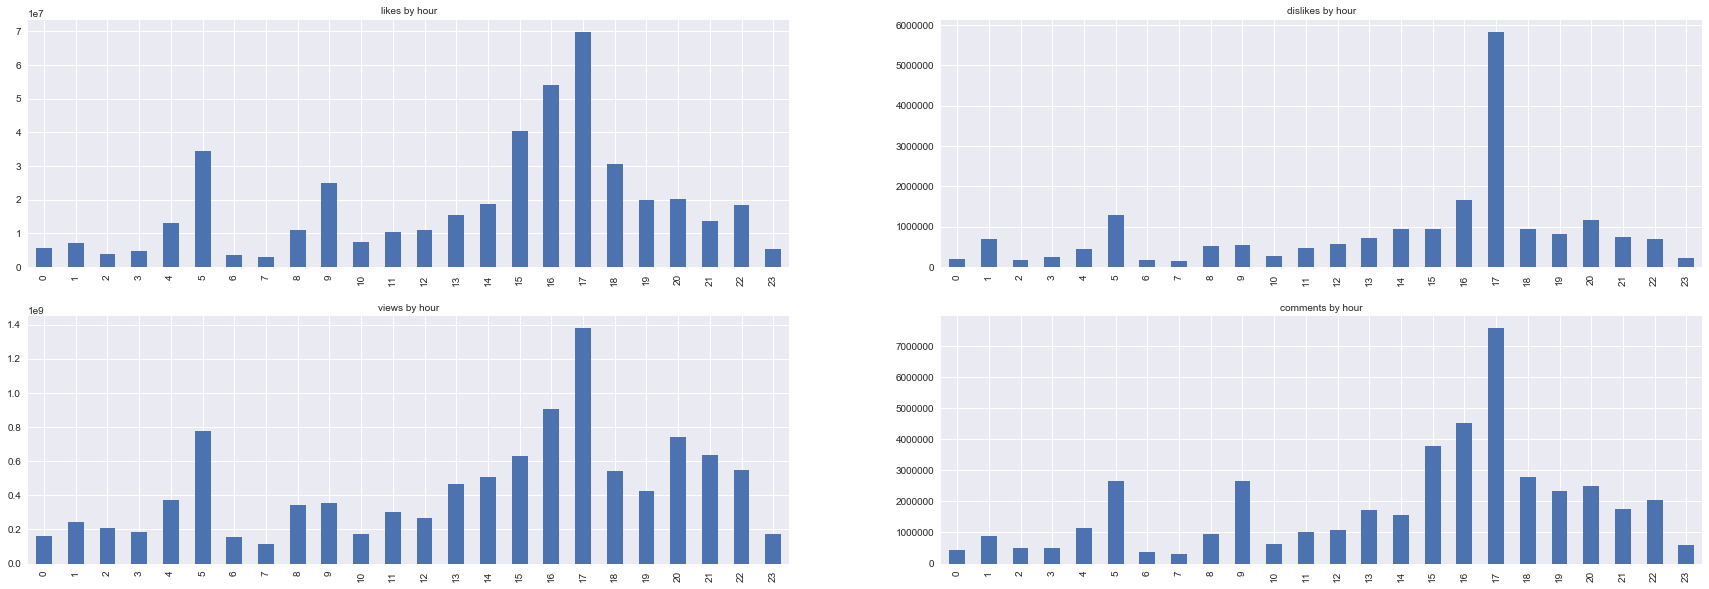

In [57]:
#sns.kdeplot(df_videos.loc[df_videos.country == 'CA', 'prc_likes'], label='CA')

hour_grp = df_videos.loc[df_videos.country == 'FR'].groupby('publish_hour')[metrics].sum()
hour_grp.reset_index(inplace=True)



fig = plt.figure(figsize=(30, 10))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


hour_grp['likes'].plot(kind='bar',title='likes by hour',ax=ax1)
hour_grp['dislikes'].plot(kind='bar',title='dislikes by hour',ax=ax2)
hour_grp['views'].plot(kind='bar',title='views by hour',ax=ax3)
hour_grp['comment_count'].plot(kind='bar',title='comments by hour',ax=ax4)

plt.show()

In [58]:
df_videos.head(2)

Country  Row ID     video_id trending_date  \
0  US      0       2kyS6SvSYSE 2017-11-14      
1  US      35      0mlNzVSJrT0 2017-11-14      

                                title channel_title  category_id  \
0  WE WANT TO TALK ABOUT OUR MARRIAGE  CaseyNeistat  22            
1  Me-O Cats Commercial                Nobrand       22            

         publish_time                       tags  likes      ...       \
0 2017-11-13 17:13:01  SHANtell martin            57527      ...        
1 2017-04-21 06:47:32  cute|"cats"|"thai"|"eggs"  2486       ...        

   publish_month  publish_day publish_hour  id   snippet.title country  \
0  11.0           13.0         17.0         22  People & Blogs  US       
1  4.0            21.0         6.0          22  People & Blogs  US       

    views prc_likes  prc_dislikes  prc_comments  
0  748374  0.076869  0.003963      0.021318      
1  98966   0.025120  0.001859      0.005376      

[2 rows x 28 columns]

#### Heatmaps of Correlation¶

Question : Does the video trending in one country will trend in other countries too? If yes,how much do they correlate to each other?

Here we got the heatmap of correlation of Youtube Trending Videos between countries. Not suprisingly, the video from United Kingdom, US and Canada is highly correlate to each other compare to Germany and France. This might due to the sharing of common language in these contries. As compare, Germany and France seems like more isolate where they did not follow the trend from english speaking countries (Just my personal opinion by observing the heatmap). This can also explain why United Kingdom has the highest number in long-trend videos, as it is contributes by multiple contries at the same time.

In [59]:
fre_df = pd.DataFrame(df_videos.groupby(['video_id','country']).count()['title'].sort_values(ascending=False)).reset_index()

In [60]:
corr_matrix = fre_df.set_index(['video_id', 'country']).unstack().fillna(0).corr()
corr_matrix

title                                        
country              CA        DE        FR        GB        US
      country                                                  
title CA       1.000000  0.000517 -0.097449  0.107727  0.153439
      DE       0.000517  1.000000 -0.234657 -0.017238 -0.057394
      FR      -0.097449 -0.234657  1.000000 -0.040160 -0.115095
      GB       0.107727 -0.017238 -0.040160  1.000000  0.212588
      US       0.153439 -0.057394 -0.115095  0.212588  1.000000

In [61]:
# fre_df = pd.DataFrame(df_videos.groupby(['video_id','country']).count()['title'].sort_values(ascending=False)).reset_index()

# corr_list = pd.DataFrame(fre_df['video_id'].unique(), columns=['video_id'])
# for country_code in fre_df['country'].unique():
#     corr_list[country_code] = 0
# corr_list['total']=0
# corr_list=corr_list.set_index('video_id')
# #print new_list
# for index , item in corr_list.iterrows():
#     #print index
#     total = 0
#     for i ,row in fre_df[fre_df['video_id'] == index][['country','title']].iterrows():
#         total += row['title']
#         corr_list.loc[[index],[row['country']]] = row['title']
#     corr_list.loc[[index],['total']] = total
# corr_list.head()

In [62]:
corr_matrix

title                                        
country              CA        DE        FR        GB        US
      country                                                  
title CA       1.000000  0.000517 -0.097449  0.107727  0.153439
      DE       0.000517  1.000000 -0.234657 -0.017238 -0.057394
      FR      -0.097449 -0.234657  1.000000 -0.040160 -0.115095
      GB       0.107727 -0.017238 -0.040160  1.000000  0.212588
      US       0.153439 -0.057394 -0.115095  0.212588  1.000000

In [63]:
# countries = 

# fig, ax = plt.subplots(figsize=(15,15))
# fig.suptitle('Correlation between countries', fontsize=20).set_y(0.85)
# heatmap = ax.imshow(corr_matrix)# , cmap=cm.YlGnBu

# # making the colorbar on the side
# cbar_min = corr_matrix.min().min()
# cbar_max = corr_matrix.max().max()
# cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# # making the labels
# labels = ['']
# for column in countries:
#     labels.append(column)
# #print labels
# ax.set_yticklabels(labels, minor=False, fontsize=15)
# ax.set_xticklabels(labels, minor=False, fontsize=15)
# corr_matrix
# plt.show()

NameError: name 'countries' is not defined

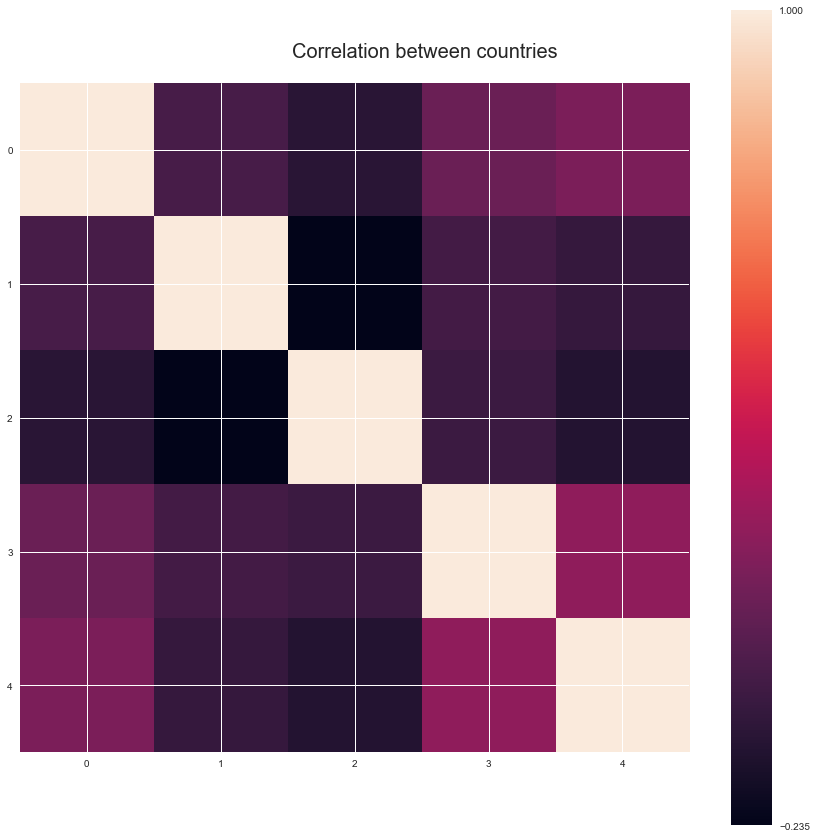

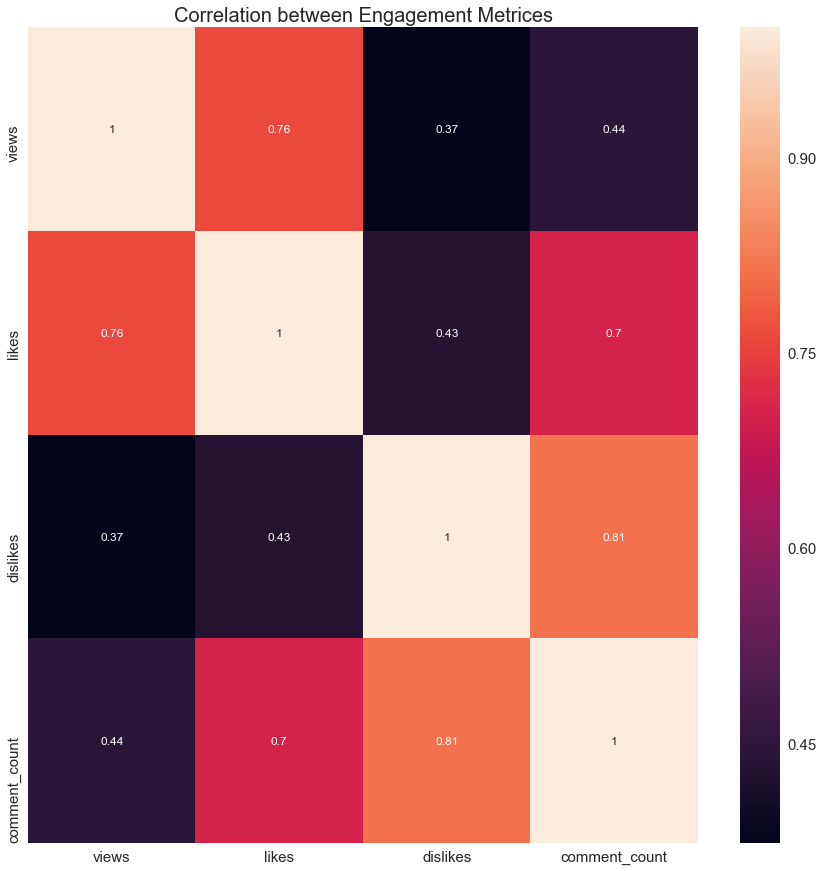

In [64]:
params = {'legend.fontsize': '15',
          'figure.figsize': (20, 5),
         'axes.labelsize': '15',
         'axes.titlesize':'15',
         'xtick.labelsize':'15',
         'ytick.labelsize':'15'}
pylab.rcParams.update(params)

fig, ax = plt.subplots(figsize=(15,15))
# fig.set_y(0.85)
#Let's verify the correlation of each value
sns.heatmap(df_videos[['views','likes','dislikes', 'comment_count']].corr(), annot=True).\
set_title('Correlation between Engagement Metrices', fontsize=20)
plt.show()

In [65]:
df_videos.reset_index()[['country', 'likes']].groupby('country')['likes'].describe() / 1000000

count      mean       std  min       25%       50%       75%  \
country                                                                    
CA       0.028454  0.037925  0.118326  0.0  0.002047  0.008651  0.027956   
DE       0.028348  0.019445  0.086138  0.0  0.000424  0.002324  0.010672   
FR       0.028376  0.015773  0.073941  0.0  0.000260  0.001590  0.007438   
GB       0.028367  0.106145  0.293362  0.0  0.004379  0.018012  0.080541   
US       0.028550  0.049842  0.151624  0.0  0.003306  0.012273  0.036609   

              max  
country            
CA       3.014479  
DE       2.811217  
FR       2.656682  
GB       4.737873  
US       3.093544

In [66]:
df_videos.reset_index()[['country', 'views']].groupby('country')['views'].describe() / 1000000

count      mean        std       min       25%       50%  \
country                                                                
CA       0.028454  1.100534  3.334410   0.001000  0.136912  0.347801   
DE       0.028348  0.546813  2.265063   0.000518  0.021698  0.100729   
FR       0.028376  0.374071  1.676319   0.000000  0.012939  0.059199   
GB       0.028367  4.633414  17.359009  0.000851  0.183628  0.691551   
US       0.028550  1.444015  4.384003   0.000549  0.154735  0.440671   

              75%         max  
country                        
CA       0.924822  137.843120  
DE       0.387915  113.876217  
FR       0.229182  100.911567  
GB       2.515851  424.538912  
US       1.235440  149.376127

In [67]:
df_videos.reset_index()[['country', 'dislikes']].groupby('country')['dislikes'].describe() / 1000000

count      mean       std  min       25%       50%       75%  \
country                                                                    
CA       0.028454  0.001964  0.021562  0.0  0.000093  0.000284  0.000929   
DE       0.028348  0.001212  0.015807  0.0  0.000023  0.000115  0.000469   
FR       0.028376  0.000721  0.012434  0.0  0.000014  0.000068  0.000292   
GB       0.028367  0.006741  0.056883  0.0  0.000150  0.000583  0.002482   
US       0.028550  0.002771  0.032345  0.0  0.000134  0.000426  0.001344   

              max  
country            
CA       1.602383  
DE       1.470386  
FR       1.353661  
GB       1.944971  
US       1.674420

In [68]:
df_videos.reset_index()[['country', 'comment_count']].groupby('country')['comment_count'].describe() / 1000000

count      mean       std  min       25%       50%       75%  \
country                                                                    
CA       0.028454  0.004737  0.018244  0.0  0.000386  0.001262  0.003601   
DE       0.028348  0.002446  0.014318  0.0  0.000066  0.000330  0.001252   
FR       0.028376  0.001560  0.011239  0.0  0.000046  0.000201  0.000761   
GB       0.028367  0.010797  0.046146  0.0  0.000508  0.001797  0.006849   
US       0.028550  0.006139  0.030839  0.0  0.000416  0.001315  0.003930   

              max  
country            
CA       0.827755  
DE       0.827755  
FR       0.827755  
GB       1.626501  
US       1.361580

In [69]:
#df_videos.views = df_videos['views'].astype(int)
#a = [type(i) for i in df_videos['views'] ]
#set(a)
#b = [isinstance(i, str) for i in df_videos['views'] ]
#df_videos['view_is_str'] = df_videos['views'].apply(lambda x: isinstance(x, str))
#int(df_videos.loc[df_videos.view_is_str, 'views'].iloc[0])
#df_videos.views = df_videos.views.apply(lambda x: int(x))

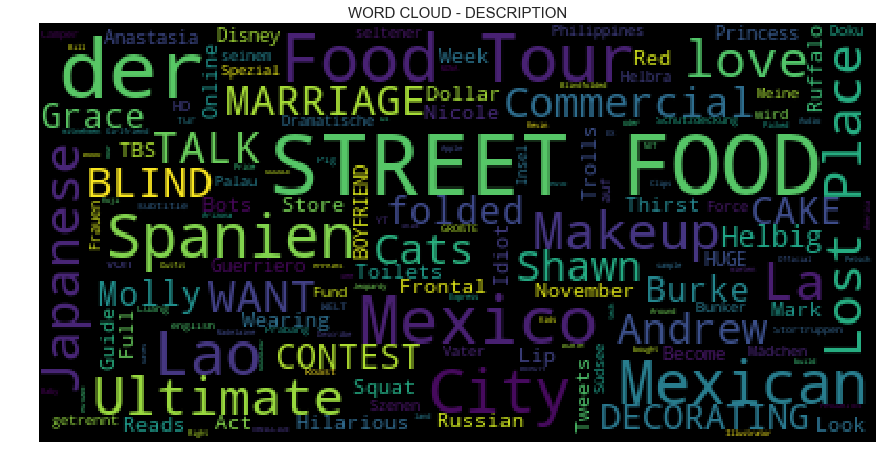

In [70]:
plt.figure(figsize = (15,15))


wordcloud = WordCloud(
                          background_color='black',
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_videos['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

In [71]:
df_videos.loc[df_videos.country=='US','comment_count']

0        15954
1        532  
2        895  
3        456  
4        6541 
5        275  
6        4702 
7        1264 
8        976  
9        2814 
10       106  
11       1404 
12       593  
13       19   
14       939  
15       0    
16       737  
17       24225
18       307  
19       594  
20       734  
21       0    
22       463  
23       6736 
24       29   
25       319  
26       4794 
27       2803 
28       1311 
29       984  
        ...   
28520    1348 
28521    30   
28522    29   
28523    30   
28524    693  
28525    911  
28526    77462
28527    1145 
28528    1495 
28529    37   
28530    1812 
28531    44   
28532    1984 
28533    54   
28534    1426 
28535    1645 
28536    1726 
28537    1802 
28538    1870 
28539    1864 
28540    1924 
28541    1964 
28542    1968 
28543    1984 
28544    1998 
28545    220  
28546    268  
28547    260  
28548    263  
28549    264  
Name: comment_count, Length: 28550, dtype: int32

In [72]:
df_videos.head()

Country  Row ID     video_id trending_date  \
0  US      0       2kyS6SvSYSE 2017-11-14      
1  US      35      0mlNzVSJrT0 2017-11-14      
2  US      44      STI2fI7sKMo 2017-11-14      
3  US      54      KODzih-pYlU 2017-11-14      
4  US      66      8mhTWqWlQzU 2017-11-14      

                                                                         title  \
0  WE WANT TO TALK ABOUT OUR MARRIAGE                                            
1  Me-O Cats Commercial                                                          
2  AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH - GOOGLE US | Shawn and Andrew   
3  BLIND(folded) CAKE DECORATING CONTEST (with Molly Burke) // Grace Helbig      
4  Wearing Online Dollar Store Makeup For A Week                                 

        channel_title  category_id        publish_time  \
0  CaseyNeistat        22          2017-11-13 17:13:01   
1  Nobrand             22          2017-04-21 06:47:32   
2  Shawn Johnson East  22          2017-11-11 15:00:03   
3  Grace Helbig        22          2017-11-11 18:08:04   
4  Safiya Nygaard      22          2017-11-11 01:19:33   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     tags  \
0  SHANtell martin                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
1  cute|"cats"|"thai"|"eggs"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
2  shawn johnson|"andrew east"|"shawn east"|"shawn and andrew"|"olympian"|"nfl player"|"athletes"|"vlog"|"couples"|"google irl"|"google feud"|"google markiplier"|"google myself"|"challenge"|"reactions"|"reacts"|"internet"|"memes"|"funny"|"birthday"|"cringe"|"laughing"|"daily"|"vlogger"|"stupid"|"cute"|"boy"|"diy"|"google"|"myself"|"googled"|"googling"|"liza"|"lizakoshy"|"wednesdays"|"liza koshy"|"googling myself"|"liza koshy net worth"|"liza koshy google"|"liza facts"|"liza panties"|"net worth"|"youtuber net worth"|"youtuber facts"   
3  itsgrace|"funny"|"comedy"|"vlog"|"grace"|"helbig"|"gracehelbig"|"dailygrace"|"daily"|"tutorial"|"diy"|"lifestyle"                                                                                                                                                                                                                                                                                                                                                                                                                                        
4  wearing online dollar store makeup for a week|"online dollar store makeup"|"dollar store makeup"|"daiso"|"shopmissa makeup"|"shopmissa haul"|"dollar store makeup h

In [73]:
def norm(series):
     return (series - np.mean(series)) / (np.max(series) - np.min(series))
    
tmp = df_videos.groupby(['country', 'video_id'])[['likes', 'views', 'dislikes', 'comment_count']].sum().reset_index()

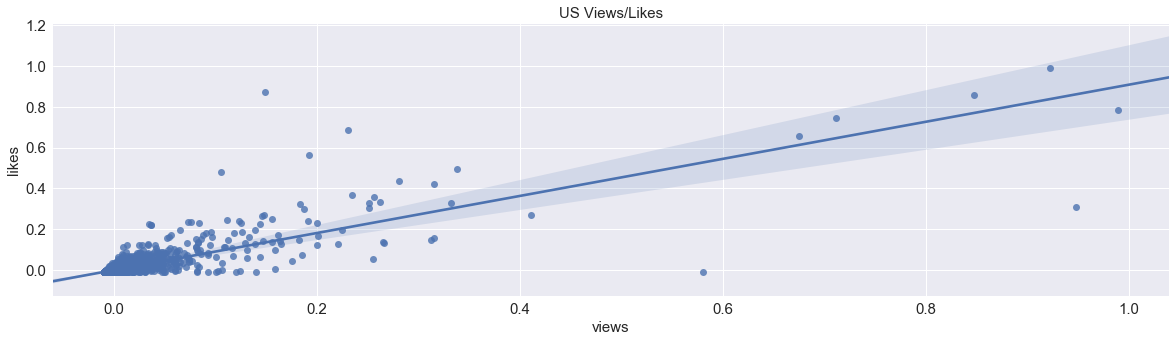

In [74]:
sns.regplot(norm(tmp.loc[tmp.country=='US','views']), norm(tmp.loc[tmp.country=='US','likes']))
plt.title('US Views/Likes')
plt.show();

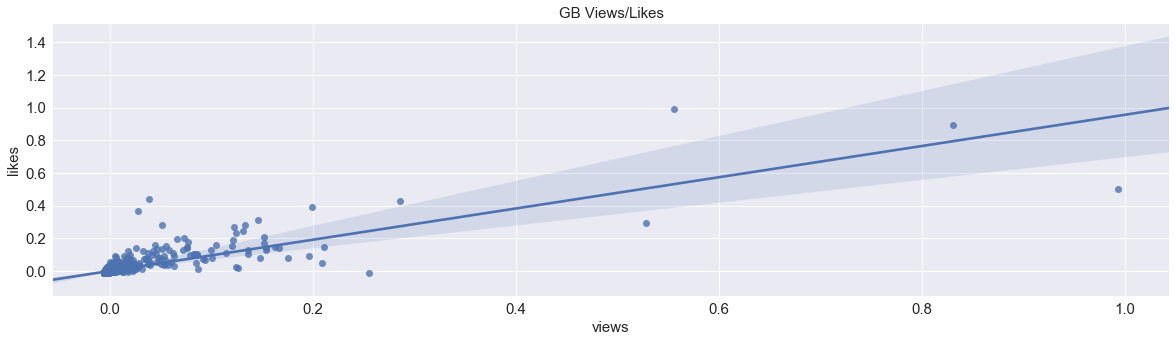

In [75]:
sns.regplot(norm(tmp.loc[tmp.country=='GB','views']), norm(tmp.loc[tmp.country=='GB','likes']))
plt.title('GB Views/Likes')
plt.show();

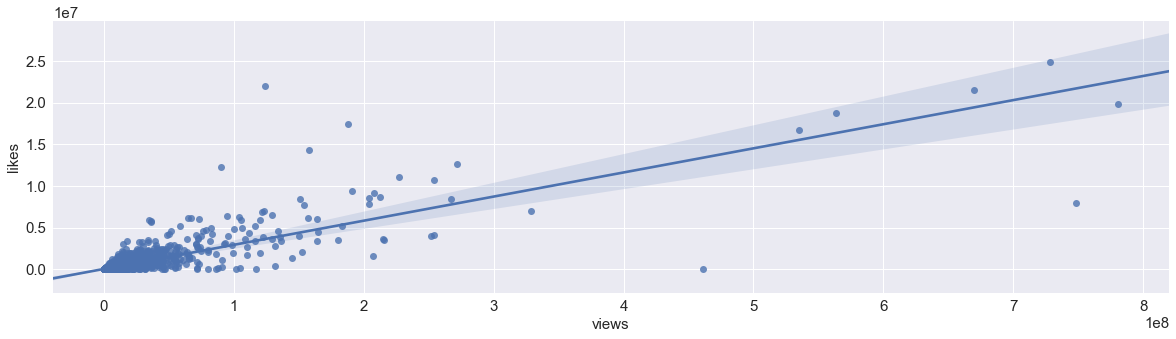

In [76]:
sns.regplot(tmp.loc[tmp.country=='US','views'], tmp.loc[tmp.country=='US','likes'])
plt.show();

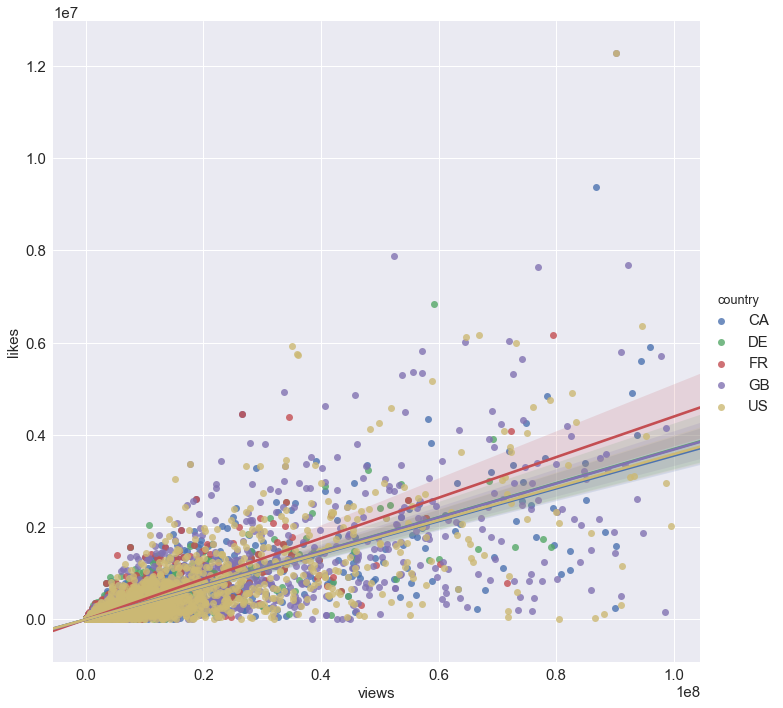

In [77]:
sns.lmplot(x="views", y="likes", hue="country", data=tmp.loc[tmp.views < 100000000], size=10)
plt.show();

In [78]:
df_videos.head(1)

Country  Row ID     video_id trending_date  \
0  US      0       2kyS6SvSYSE 2017-11-14      

                                title channel_title  category_id  \
0  WE WANT TO TALK ABOUT OUR MARRIAGE  CaseyNeistat  22            

         publish_time             tags  likes      ...       publish_month  \
0 2017-11-13 17:13:01  SHANtell martin  57527      ...       11.0            

   publish_day publish_hour  id   snippet.title country   views prc_likes  \
0  13.0         17.0         22  People & Blogs  US      748374  0.076869   

   prc_dislikes  prc_comments  
0  0.003963      0.021318      

[1 rows x 28 columns]

In [79]:
df_videos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142095 entries, 0 to 142094
Data columns (total 28 columns):
Country                   142095 non-null object
Row ID                    142095 non-null int64
video_id                  142095 non-null object
trending_date             142095 non-null datetime64[ns]
title                     142095 non-null object
channel_title             142095 non-null object
category_id               142095 non-null int64
publish_time              142095 non-null datetime64[ns]
tags                      142095 non-null object
likes                     142095 non-null int32
dislikes                  142095 non-null int32
comment_count             142095 non-null int32
thumbnail_link            142095 non-null object
comments_disabled         142095 non-null object
ratings_disabled          142095 non-null object
video_error_or_removed    142095 non-null object
description               142095 non-null object
publish_date              142095 non-null obj

In [80]:
df_videos_title.head()

likes  \
country title                                                                         
CA      !! THIS VIDEO IS NOTHING BUT PAIN !! | Getting Over It - Part 7       47058   
        #1 Fortnite World Rank - 2,323 Solo Wins!                             5199    
        #1 Fortnite World Rank - 2,330 Solo Wins!                             5620    
        #1 MOST ANTICIPATED VIDEO (Timber Frame House Raising)                23276   
        #1 WORLD RANKED 1463 SOLO WINS! - FORTNITE BATTLE ROYALE LIVE STREAM  15430   

                                                                               views  \
country title                                                                          
CA      !! THIS VIDEO IS NOTHING BUT PAIN !! | Getting Over It - Part 7       835930   
        #1 Fortnite World Rank - 2,323 Solo Wins!                             212838   
        #1 Fortnite World Rank - 2,330 Solo Wins!                             200764   
        #1 MOST ANTICIPATED VIDEO (Timber Frame House Raising)                311914   
        #1 WORLD RANKED 1463 SOLO WINS! - FORTNITE BATTLE ROYALE LIVE STREAM  541482   

                                                                              comment_count  \
country title                                                                                 
CA      !! THIS VIDEO IS NOTHING BUT PAIN !! | Getting Over It - Part 7       8250.0          
        #1 Fortnite World Rank - 2,323 Solo Wins!                             11.0            
        #1 Fortnite World Rank - 2,330 Solo Wins!                             45.0            
        #1 MOST ANTICIPATED VIDEO (Timber Frame House Raising)                5566.0          
        #1 WORLD RANKED 1463 SOLO WINS! - FORTNITE BATTLE ROYALE LIVE STREAM  40.0            

                                                                              dislikes  
country title                                                                           
CA      !! THIS VIDEO IS NOTHING BUT PAIN !! | Getting Over It - Part 7       1023      
        #1 Fortnite World Rank - 2,323 Solo Wins!                             542       
        #1 Fortnite World Rank - 2,330 Solo Wins!                             537       
        #1 MOST ANTICIPATED VIDEO (Timber Frame House Raising)                488       
        #1 WORLD RANKED 1463 SOLO WINS! - FORTNITE BATTLE ROYALE LIVE STREAM  891

In [81]:
#df_videos_title.reset_index()['country'] == 'FR'

In [82]:
#df_videos_title['likes']>0

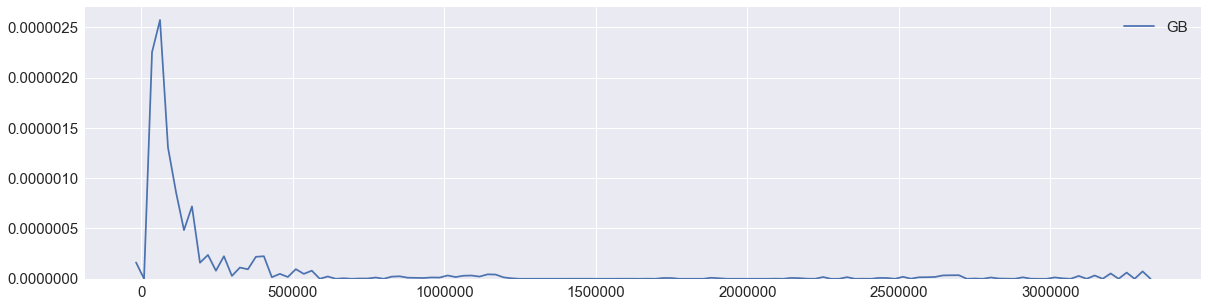

In [83]:
# sns.kdeplot(df_videos.loc[list((df_videos_title.reset_index()['country'] == 'FR') & (df_videos_title.reset_index()['likes']>0)), 'likes'], 
#             label='FR')
sns.kdeplot(df_videos.loc[list(df_videos_title.reset_index()['country'] == 'GB'), 'likes'], label='GB')
# sns.kdeplot(df_videos_title.loc[list(df_videos_title.reset_index()['country'] == 'US'), 'likes'], label='US')
plt.legend()
plt.show()

In [84]:
df_videos_title.shape

(66599, 4)

In [85]:
likes.head()

country                                                             title  \
0  US      RAPID EYE MOVEMENT⎪Official Teaser Trailer                         
1  FR      شاهد ماذا قال رابح ماجر عن خروج محرز  ( والله ميزيد يلعب )......   
2  FR      La dernière Lune de l'année2017                                    
3  DE      [ENG] 171129 [EPISODE] BTS (방탄소년단) ‘MIC Drop’ MV Shooting          
4  FR      Franck Dubosc - On n'est pas couché 10 mars 2018 #ONPC             

   likes     views  comment_count  dislikes  prc_likes  prc_dislikes  
0  0.0    0.005207  0.000006       0.0       0.0        0.0           
1  0.0    0.218462  0.000333       0.0       0.0        0.0           
2  0.0    0.003764  0.000046       0.0       0.0        0.0           
3  0.0    0.122160  0.001031       0.0       0.0        0.0           
4  0.0    0.004040  0.000000       0.0       0.0        0.0

#### Most liked videos of all countries

#### Most viewd videos of all countries

#### 10 most liked, disliked, viewed videos per country

In [86]:
#likes.groupby('country').tail(10)

In [87]:
#g = sns.FacetGrid(melted, col="variable")
#g.map(sns.barplot,'interval','value')

In [88]:
#likes.loc[likes.country == cntry, ['likes', 'title']].tail(10)

In [89]:
#grid = sns.FacetGrid(likes.groupby('country').tail(10)[['title', 'likes', 'country']], col='country')
#g = grid.map(sns.barplot,  'likes', 'title')
# grid.axes[0][0].legend()
# bp.set_titles("{col_name}")
# bp.set_ylabels("Time (s)")
# bp.set_xlabels("Number")


In [90]:
# fig, ax = plt.subplots(nrows=2, ncols=3)
#for cntry in likes.country.unique():
#plt.subplots(nrows=2, ncols=3)
#likes[likes.country == cntry][['likes', 'title']].tail(10).plot(kind='barh',x='title',y='likes', title= '10 most liked videos')
#plt.show()

In [91]:
#likes.tail(10)

### Trend Videos

In [92]:
df_videos_trend = pd.DataFrame(df_videos.reset_index().groupby(['country', 'video_id'])['title'].count())
df_videos_trend.reset_index(inplace=True)
#df_videos_trend.info()

In [93]:
df_videos_trend.head(10)

country     video_id  title
0  CA      --wOJ2VyKDI  1    
1  CA      -0DjA_r32uQ  1    
2  CA      -0F7AFzWXik  1    
3  CA      -0NhqVYR4UY  1    
4  CA      -0QvjiG4sYM  2    
5  CA      -0XP8UXesHg  1    
6  CA      -0qe75Q5vOg  1    
7  CA      -10X8LZxvOE  1    
8  CA      -195_1aDUyc  2    
9  CA      -2ZDiW0dgIw  1

How long usually a video can trend in different countries?
The greater the number of apperances indicate the long-last the video trend is.

In [94]:
df_videos_trend.reset_index(inplace=True)

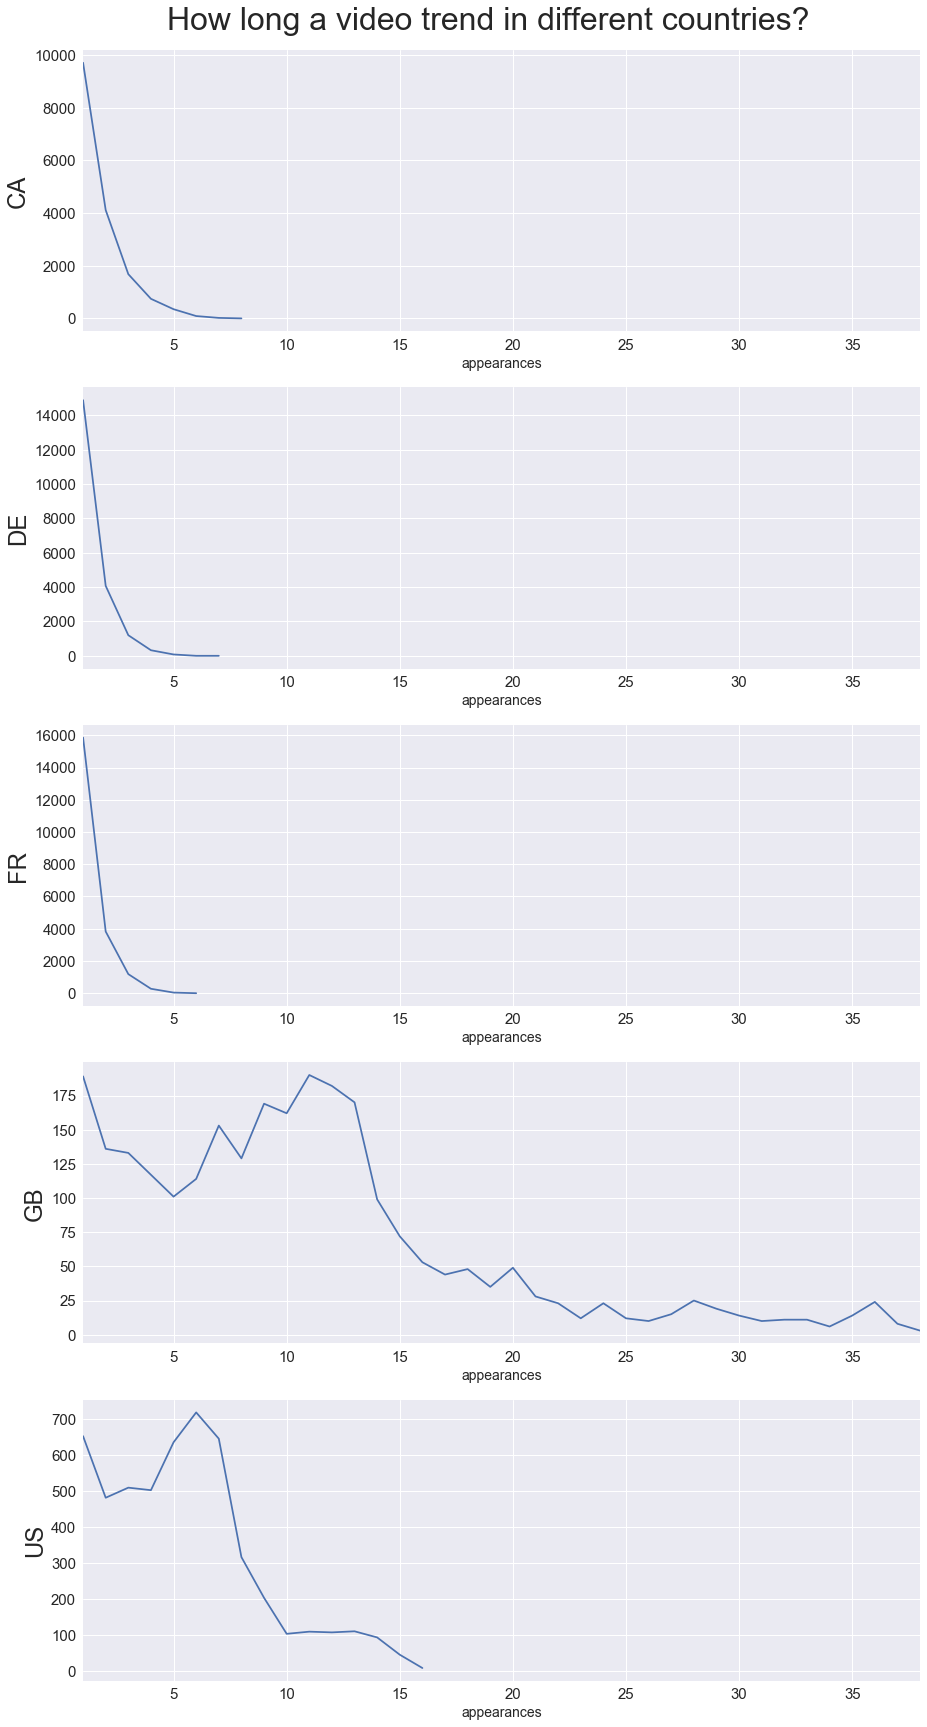

In [95]:
video_list,max_list = list(),list()
country_list = df_videos.groupby(['country']).count().index

for c in country_list:
    video_list.append(df_videos_trend[df_videos_trend['country']==c]['title'].value_counts().sort_index())
    max_list.append(max(df_videos_trend[df_videos_trend['country']==c]['title'].value_counts().sort_index().index))

fig, [ax0, ax1, ax2, ax3, ax4] = plt.subplots(nrows=5,figsize=(15, 30))
st = fig.suptitle("How long a video trend in different countries?", fontsize=32)
st.set_y(0.9)
for i, pt in enumerate([ax0, ax1, ax2, ax3, ax4]):
    pt.plot(video_list[i].index, video_list[i])
    pt.spines['right'].set_visible(False)
    pt.spines['top'].set_visible(False)
    pt.set_xlabel("appearances",fontsize=14)
    pt.set_ylabel(country_list[i],fontsize=24)
    pt.axes.set_xlim(1, max(max_list))

# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0)

plt.show()


In [96]:
#print(df_videos['snippet.title'].value_counts()[:5])

## How many likes, dislikes, views and comments get by different countries?

In [97]:
len(df_videos['publish_date'])

142095

In [98]:
df_videos.head()

Country  Row ID     video_id trending_date  \
0  US      0       2kyS6SvSYSE 2017-11-14      
1  US      35      0mlNzVSJrT0 2017-11-14      
2  US      44      STI2fI7sKMo 2017-11-14      
3  US      54      KODzih-pYlU 2017-11-14      
4  US      66      8mhTWqWlQzU 2017-11-14      

                                                                         title  \
0  WE WANT TO TALK ABOUT OUR MARRIAGE                                            
1  Me-O Cats Commercial                                                          
2  AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH - GOOGLE US | Shawn and Andrew   
3  BLIND(folded) CAKE DECORATING CONTEST (with Molly Burke) // Grace Helbig      
4  Wearing Online Dollar Store Makeup For A Week                                 

        channel_title  category_id        publish_time  \
0  CaseyNeistat        22          2017-11-13 17:13:01   
1  Nobrand             22          2017-04-21 06:47:32   
2  Shawn Johnson East  22          2017-11-11 15:00:03   
3  Grace Helbig        22          2017-11-11 18:08:04   
4  Safiya Nygaard      22          2017-11-11 01:19:33   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     tags  \
0  SHANtell martin                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
1  cute|"cats"|"thai"|"eggs"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
2  shawn johnson|"andrew east"|"shawn east"|"shawn and andrew"|"olympian"|"nfl player"|"athletes"|"vlog"|"couples"|"google irl"|"google feud"|"google markiplier"|"google myself"|"challenge"|"reactions"|"reacts"|"internet"|"memes"|"funny"|"birthday"|"cringe"|"laughing"|"daily"|"vlogger"|"stupid"|"cute"|"boy"|"diy"|"google"|"myself"|"googled"|"googling"|"liza"|"lizakoshy"|"wednesdays"|"liza koshy"|"googling myself"|"liza koshy net worth"|"liza koshy google"|"liza facts"|"liza panties"|"net worth"|"youtuber net worth"|"youtuber facts"   
3  itsgrace|"funny"|"comedy"|"vlog"|"grace"|"helbig"|"gracehelbig"|"dailygrace"|"daily"|"tutorial"|"diy"|"lifestyle"                                                                                                                                                                                                                                                                                                                                                                                                                                        
4  wearing online dollar store makeup for a week|"online dollar store makeup"|"dollar store makeup"|"daiso"|"shopmissa makeup"|"shopmissa haul"|"dollar store makeup h

In [99]:
tmp = df_videos.set_index('publish_date')
tmp.index = pd.to_datetime(tmp.index)
tmp = tmp[tmp.index >='2017-11-01'].groupby([pd.TimeGrouper('W'), 'Country'])['likes'].sum()

In [100]:
tmp.plot()

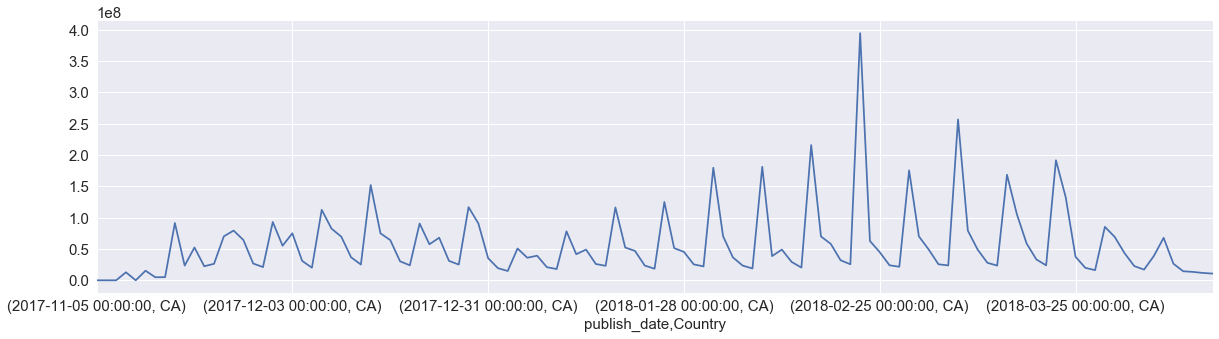

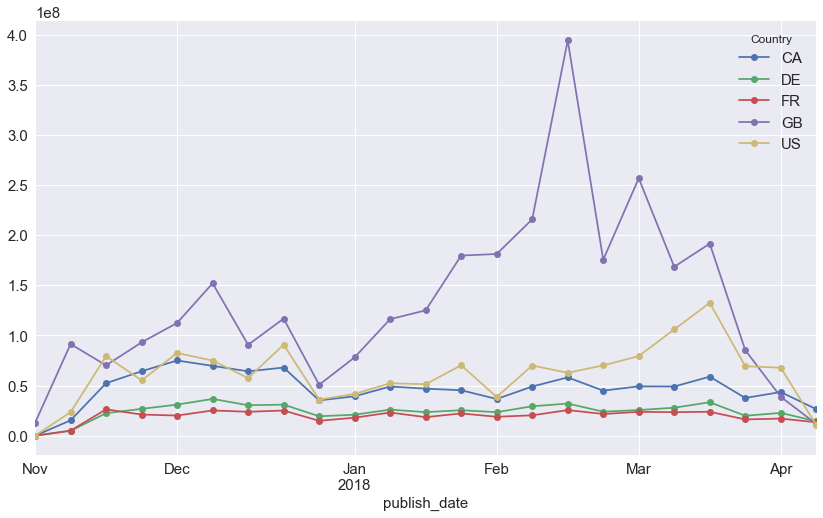

In [101]:
tmp.unstack().plot(figsize=(14, 8), marker='o')
plt.show()

In [102]:
df_videos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142095 entries, 0 to 142094
Data columns (total 28 columns):
Country                   142095 non-null object
Row ID                    142095 non-null int64
video_id                  142095 non-null object
trending_date             142095 non-null datetime64[ns]
title                     142095 non-null object
channel_title             142095 non-null object
category_id               142095 non-null int64
publish_time              142095 non-null datetime64[ns]
tags                      142095 non-null object
likes                     142095 non-null int32
dislikes                  142095 non-null int32
comment_count             142095 non-null int32
thumbnail_link            142095 non-null object
comments_disabled         142095 non-null object
ratings_disabled          142095 non-null object
video_error_or_removed    142095 non-null object
description               142095 non-null object
publish_date              142095 non-null obj

In [103]:
df_videos['likes_log'] = np.log(df_videos['likes'] + 1)
df_videos['views_log'] = np.log(df_videos['views'] + 1)
df_videos['dislikes_log'] = np.log(df_videos['dislikes'] + 1)
df_videos['comment_log'] = np.log(df_videos['comment_count'] + 1)

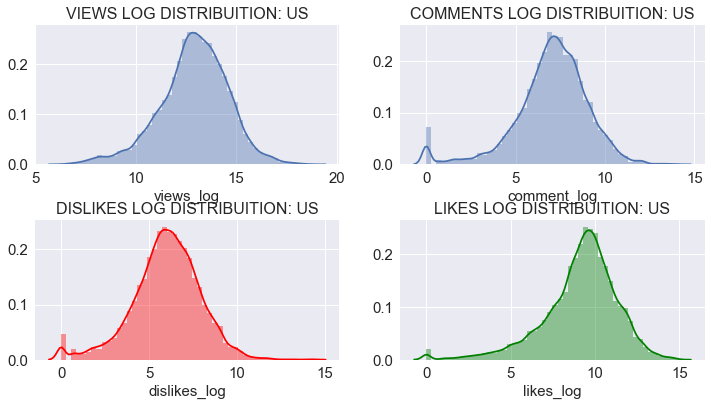

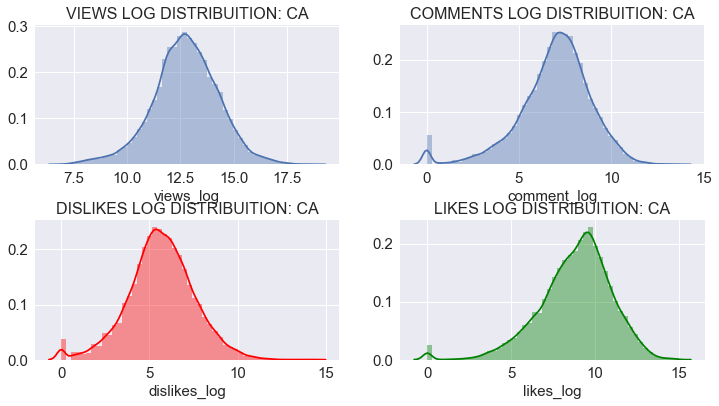

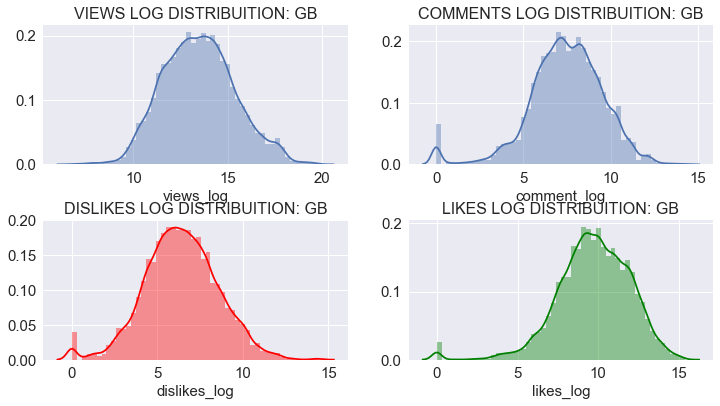

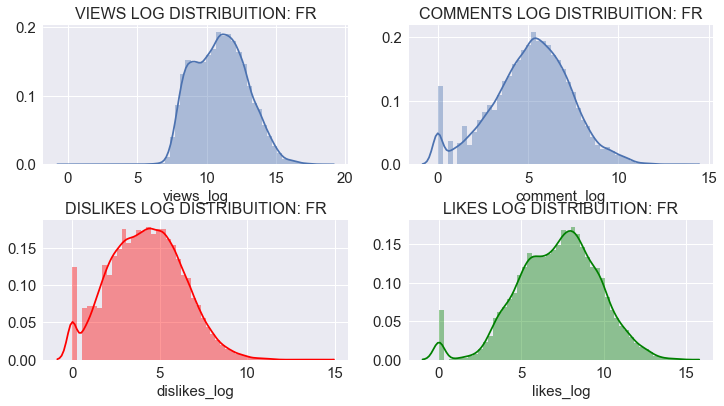

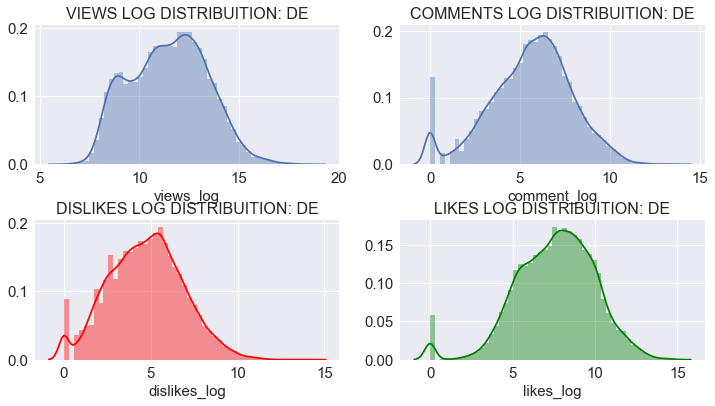

In [104]:
for cntry in df_videos.country.unique():
    
    tmp = df_videos[df_videos.country == cntry]
    plt.figure(figsize = (12,6))
    
    plt.subplot(221)
    g1 = sns.distplot(tmp['views_log'])
    g1.set_title("VIEWS LOG DISTRIBUITION: " + cntry, fontsize=16)
    
    plt.subplot(224)
    g2 = sns.distplot(tmp['likes_log'],color='green')
    g2.set_title('LIKES LOG DISTRIBUITION: ' + cntry, fontsize=16)
    
    plt.subplot(223)
    g3 = sns.distplot(tmp['dislikes_log'], color='r')
    g3.set_title("DISLIKES LOG DISTRIBUITION: " + cntry, fontsize=16)
    
    plt.subplot(222)
    g4 = sns.distplot(tmp['comment_log'])
    g4.set_title("COMMENTS LOG DISTRIBUITION: " + cntry, fontsize=16)
    
    plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
    
    plt.show()

In [105]:
print("Views quantiles")
print(df_videos.loc[df_videos.country=='US','views'].quantile([.01,.25,.5,.75,.99]))
#print(df_videos['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(df_videos.loc[df_videos.country=='US','likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(df_videos.loc[df_videos.country=='US','dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(df_videos.loc[df_videos.country=='US','comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01    3311.49    
0.25    154735.25  
0.50    440670.50  
0.75    1235439.50 
0.99    17862758.31
Name: views, dtype: float64

Likes quantiles
0.01    7.00     
0.25    3306.25  
0.50    12273.00 
0.75    36608.50 
0.99    657381.93
Name: likes, dtype: float64

Dislikes quantiles
0.01    0.00    
0.25    134.00  
0.50    426.00  
0.75    1343.75 
0.99    27005.20
Name: dislikes, dtype: float64

Comment quantiles
0.01    0.00    
0.25    416.00  
0.50    1315.00 
0.75    3929.75 
0.99    75617.17
Name: comment_count, dtype: float64


In [106]:
print("Views quantiles")
print(df_videos.loc[df_videos.country=='GB','views'].quantile([.01,.25,.5,.75,.99]))
#print(df_videos['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(df_videos.loc[df_videos.country=='GB','likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(df_videos.loc[df_videos.country=='GB','dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(df_videos.loc[df_videos.country=='GB','comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01    15088.70   
0.25    183628.00  
0.50    691551.00  
0.75    2515851.00 
0.99    62660661.88
Name: views, dtype: float64

Likes quantiles
0.01    22.00     
0.25    4379.50   
0.50    18012.00  
0.75    80540.50  
0.99    1433644.58
Name: likes, dtype: float64

Dislikes quantiles
0.01    0.00    
0.25    150.00  
0.50    583.00  
0.75    2482.00 
0.99    95940.42
Name: dislikes, dtype: float64

Comment quantiles
0.01    0.00     
0.25    508.00   
0.50    1797.00  
0.75    6848.50  
0.99    161593.92
Name: comment_count, dtype: float64


In [107]:
print("Views quantiles")
print(df_videos.loc[df_videos.country=='CA','views'].quantile([.01,.25,.5,.75,.99]))
#print(df_videos['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(df_videos.loc[df_videos.country=='CA','likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(df_videos.loc[df_videos.country=='CA','dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(df_videos.loc[df_videos.country=='CA','comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01    5201.59    
0.25    136911.75  
0.50    347800.50  
0.75    924822.50  
0.99    13376485.13
Name: views, dtype: float64

Likes quantiles
0.01    15.00    
0.25    2047.25  
0.50    8650.50  
0.75    27955.50 
0.99    459986.22
Name: likes, dtype: float64

Dislikes quantiles
0.01    0.00    
0.25    93.00   
0.50    284.00  
0.75    929.00  
0.99    24576.23
Name: dislikes, dtype: float64

Comment quantiles
0.01    0.00    
0.25    386.00  
0.50    1261.50 
0.75    3601.00 
0.99    53005.72
Name: comment_count, dtype: float64


In [108]:
print("Views quantiles")
print(df_videos.loc[df_videos.country=='FR','views'].quantile([.01,.25,.5,.75,.99]))
#print(df_videos['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(df_videos.loc[df_videos.country=='FR','likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(df_videos.loc[df_videos.country=='FR','dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(df_videos.loc[df_videos.country=='FR','comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01    1855.75   
0.25    12939.25  
0.50    59199.00  
0.75    229181.50 
0.99    4729648.25
Name: views, dtype: float64

Likes quantiles
0.01    0.00     
0.25    260.00   
0.50    1590.00  
0.75    7438.00  
0.99    259503.75
Name: likes, dtype: float64

Dislikes quantiles
0.01    0.0   
0.25    14.0  
0.50    68.0  
0.75    292.0 
0.99    8964.0
Name: dislikes, dtype: float64

Comment quantiles
0.01    0.00    
0.25    46.00   
0.50    201.00  
0.75    761.00  
0.99    24531.75
Name: comment_count, dtype: float64


In [109]:
print("Views quantiles")
print(df_videos.loc[df_videos.country=='DE','views'].quantile([.01,.25,.5,.75,.99]))
#print(df_videos['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(df_videos.loc[df_videos.country=='DE','likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(df_videos.loc[df_videos.country=='DE','dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(df_videos.loc[df_videos.country=='DE','comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01    2530.47   
0.25    21698.25  
0.50    100729.50 
0.75    387915.25 
0.99    7428996.14
Name: views, dtype: float64

Likes quantiles
0.01    0.00     
0.25    424.00   
0.50    2324.00  
0.75    10672.00 
0.99    297519.59
Name: likes, dtype: float64

Dislikes quantiles
0.01    0.00    
0.25    23.00   
0.50    115.00  
0.75    469.25  
0.99    16592.06
Name: dislikes, dtype: float64

Comment quantiles
0.01    0.00    
0.25    66.00   
0.50    330.00  
0.75    1252.00 
0.99    33828.14
Name: comment_count, dtype: float64


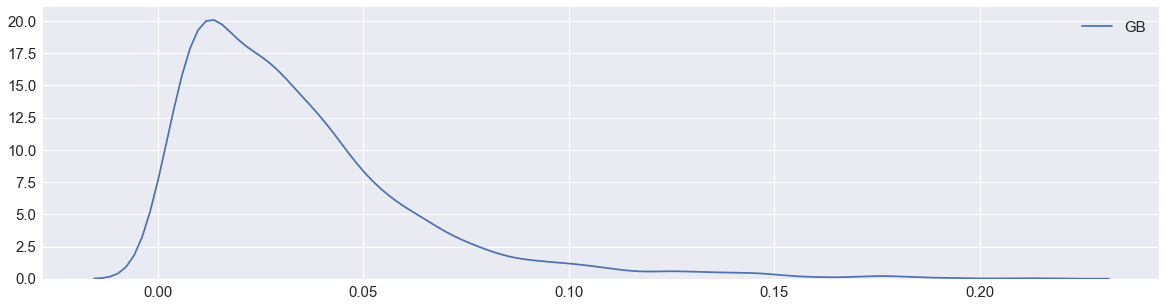

In [534]:
sns.kdeplot(likes.loc[likes.country == 'GB', 'prc_likes'], label='GB')
plt.show();

H0: The data folow the normal distribution 
H1: The data do not folow the normal distridution 

chi-square statistic: 66593.3539325
p value = 0.0
The null hypothesis can be rejected


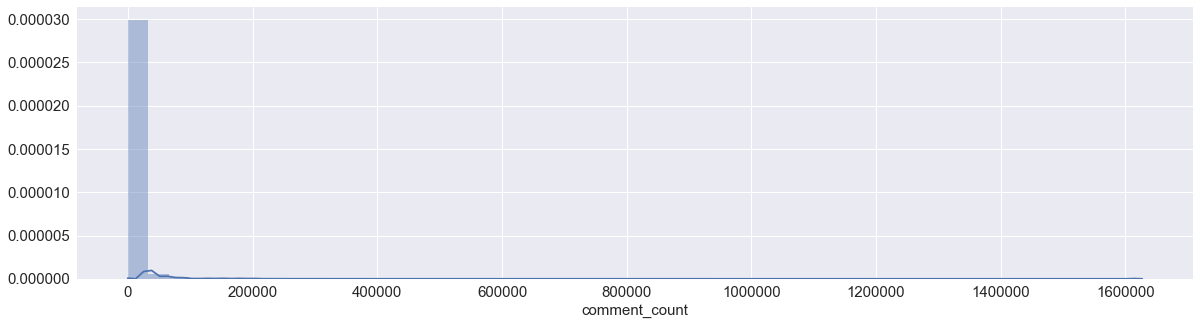

In [112]:
def normal_hypoth_test(data, alpha):
    # calculate statistic & p-value
    #statistic, p_val = normaltest(df_videos['comment_count'])
    statistic, p_val = normaltest(df_videos.loc[df_videos.country=='US','comment_count'])
    print('chi-square statistic:',statistic)
    print('p value =',p_val)
    return statistic, p_val

stat, p_val = normal_hypoth_test(df_videos.loc[df_videos.country=='US', 'comment_count'], alpha=0.05)
#stat, p_val = normal_hypoth_test(df_videos['comment_count'], alpha=0.05)
# chi-square statistic: 8412.44775274
# p value = 0.0
# The null hypothesis can be rejected

if p_val < 0.05:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
# The null hypothesis can be rejected

Plot=sns.distplot(df_videos['comment_count'])
plt.show()

chi-square statistic: 46871.8127383
p value = 0.0
The null hypothesis can be rejected


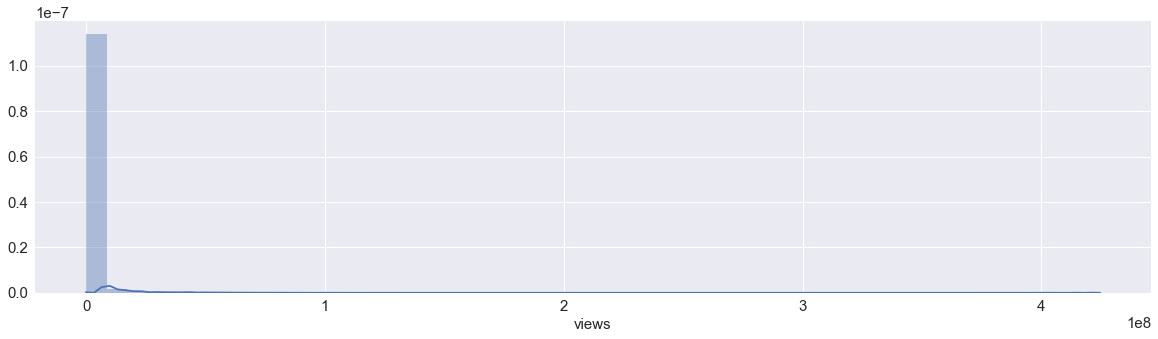

In [113]:
def normal_hypoth_test(data, alpha):
    # calculate statistic & p-value
    #statistic, p_val = normaltest(df_videos['comment_count'])
    statistic, p_val = normaltest(df_videos.loc[df_videos.country=='GB','views'])
    print('chi-square statistic:',statistic)
    print('p value =',p_val)
    return statistic, p_val

stat, p_val = normal_hypoth_test(df_videos.loc[df_videos.country=='GB', 'views'], alpha=0.05)
#stat, p_val = normal_hypoth_test(df_videos['comment_count'], alpha=0.05)
# chi-square statistic: 8412.44775274
# p value = 0.0
# The null hypothesis can be rejected

if p_val < 0.05:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
# The null hypothesis can be rejected

Plot=sns.distplot(df_videos['views'])
plt.show()

In [114]:
df_videos['like_rate'] =  df_videos ['likes'] / df_videos['views'] * 100
df_videos['dislike_rate'] =  df_videos ['dislikes'] / df_videos['views'] * 100
df_videos['comment_rate'] =  df_videos ['comment_count'] / df_videos['views'] * 100

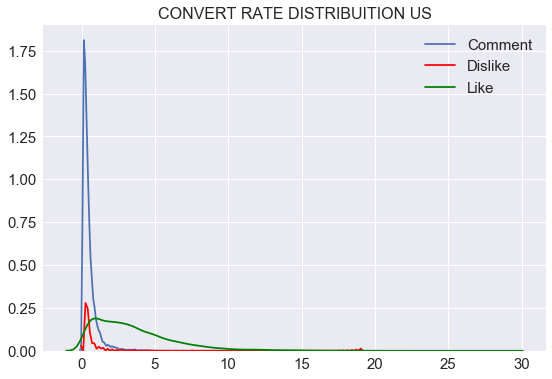

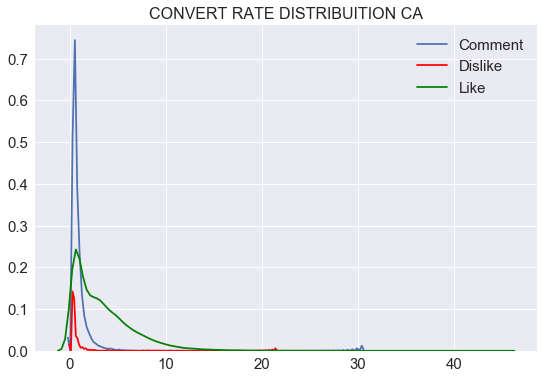

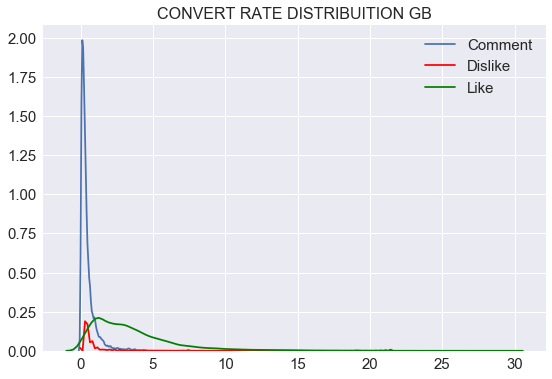

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


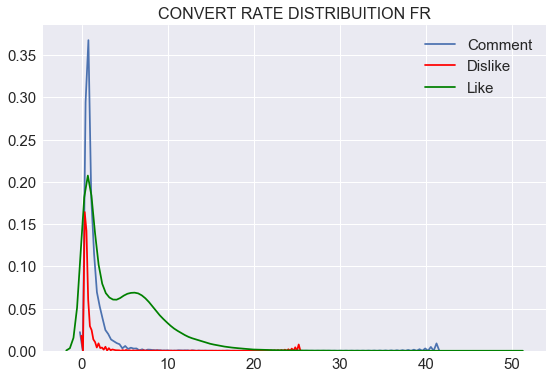

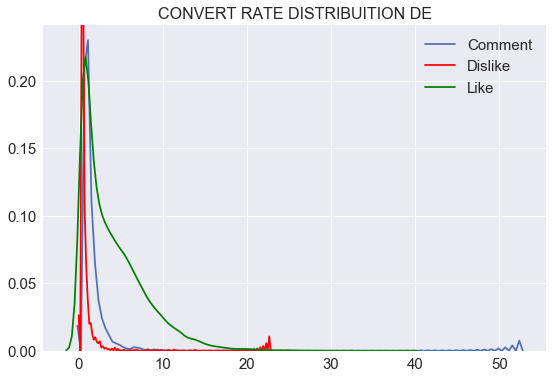

In [115]:
for cntry in df_videos.country.unique():
    
    tmp = df_videos[df_videos.country == cntry]

    plt.figure(figsize = (9,6))
    
    g1 = sns.distplot(tmp['comment_rate'],hist=False,label="Comment")
    g1 = sns.distplot(tmp['dislike_rate'], color='red',hist=False, label="Dislike")
    g1 = sns.distplot(tmp['like_rate'], color='green',hist=False, label="Like")
    g1.set_title('CONVERT RATE DISTRIBUITION '+ cntry, fontsize=16)
    g1.set_xlabel('')
    plt.legend()
    plt.show()

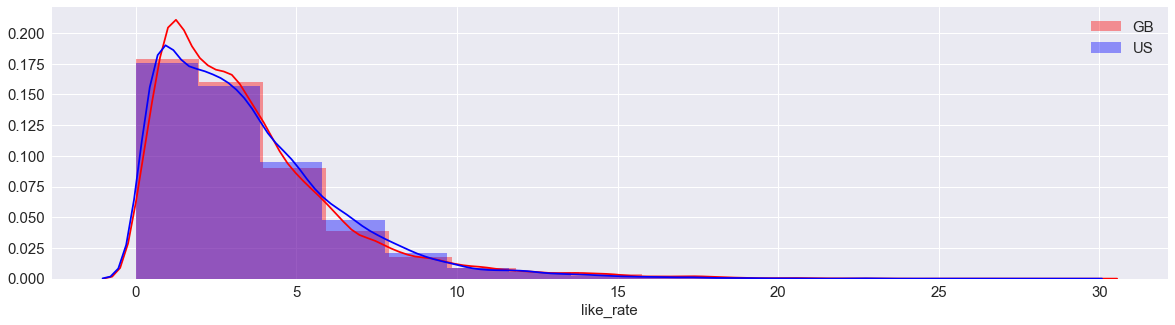

In [116]:

sns.distplot(df_videos.like_rate[df_videos.country == 'GB'], label='GB', color='red', bins=15)
sns.distplot(df_videos.like_rate[df_videos.country == 'US'], label='US', color='blue', bins=15)

plt.legend()
plt.show();

In [117]:
tmp = df_videos.groupby(['country', 'video_id'])[['likes', 'views', 'dislikes', 'comment_count']].sum().reset_index()
plt.show()

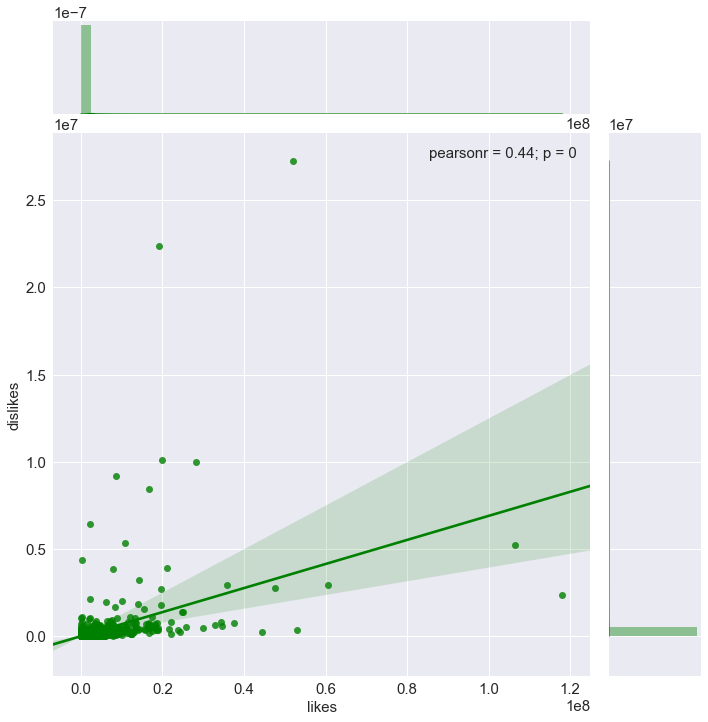

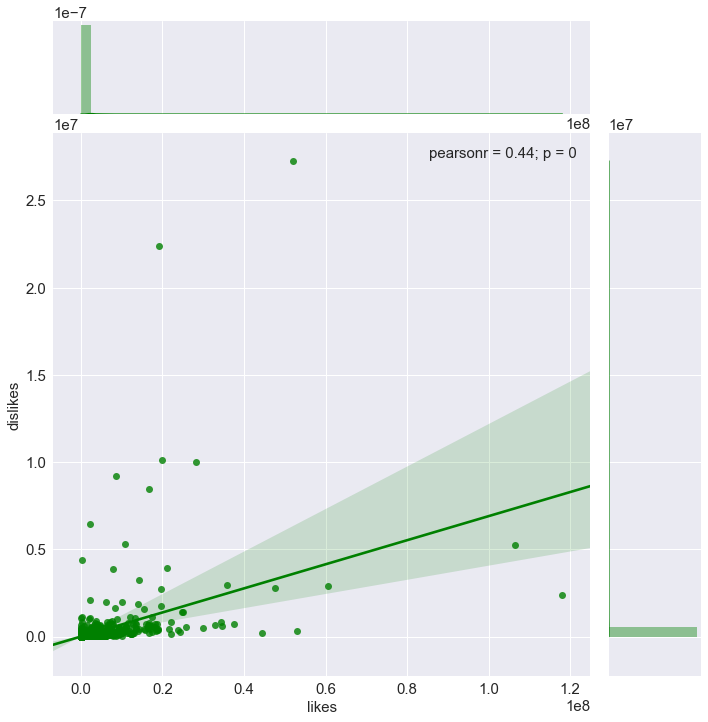

In [119]:
sns.jointplot('likes', 'dislikes', data=tmp, kind='reg', size=10, color='green')
plt.show();

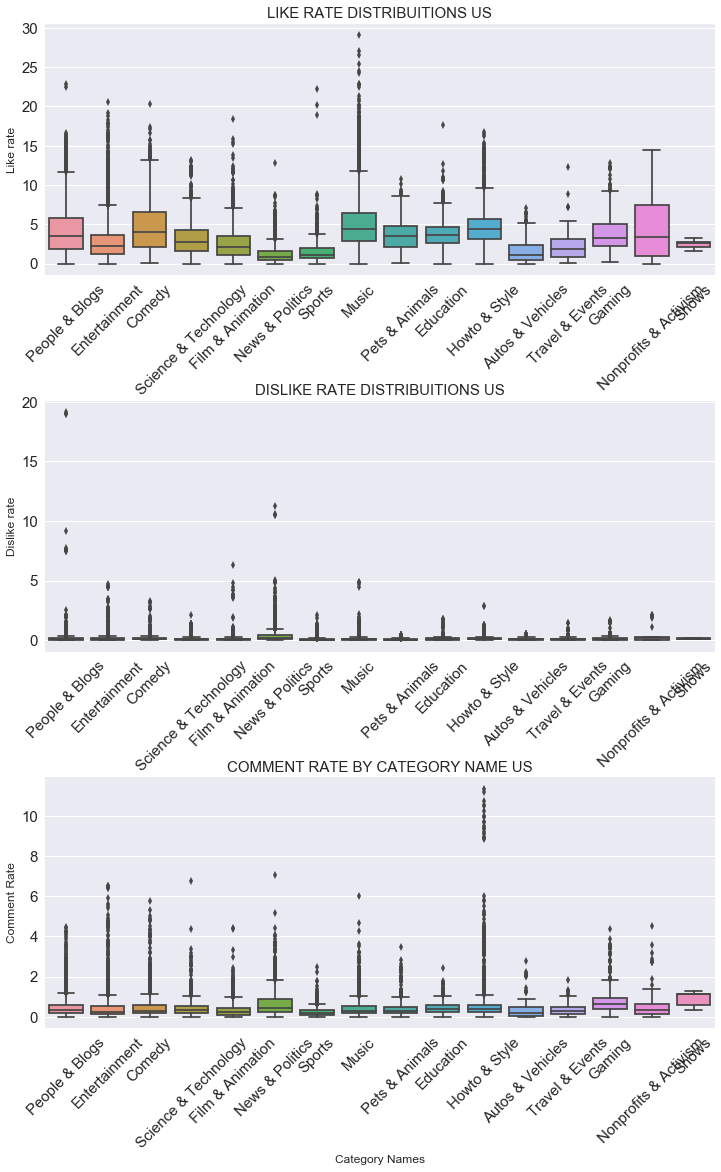

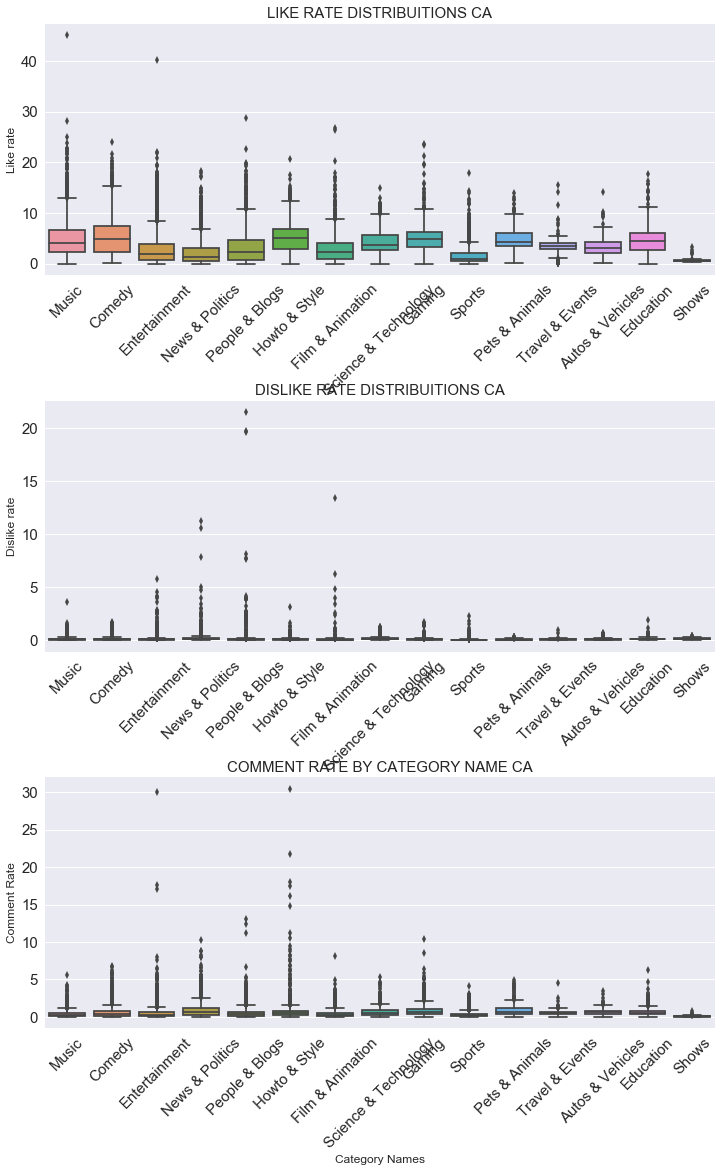

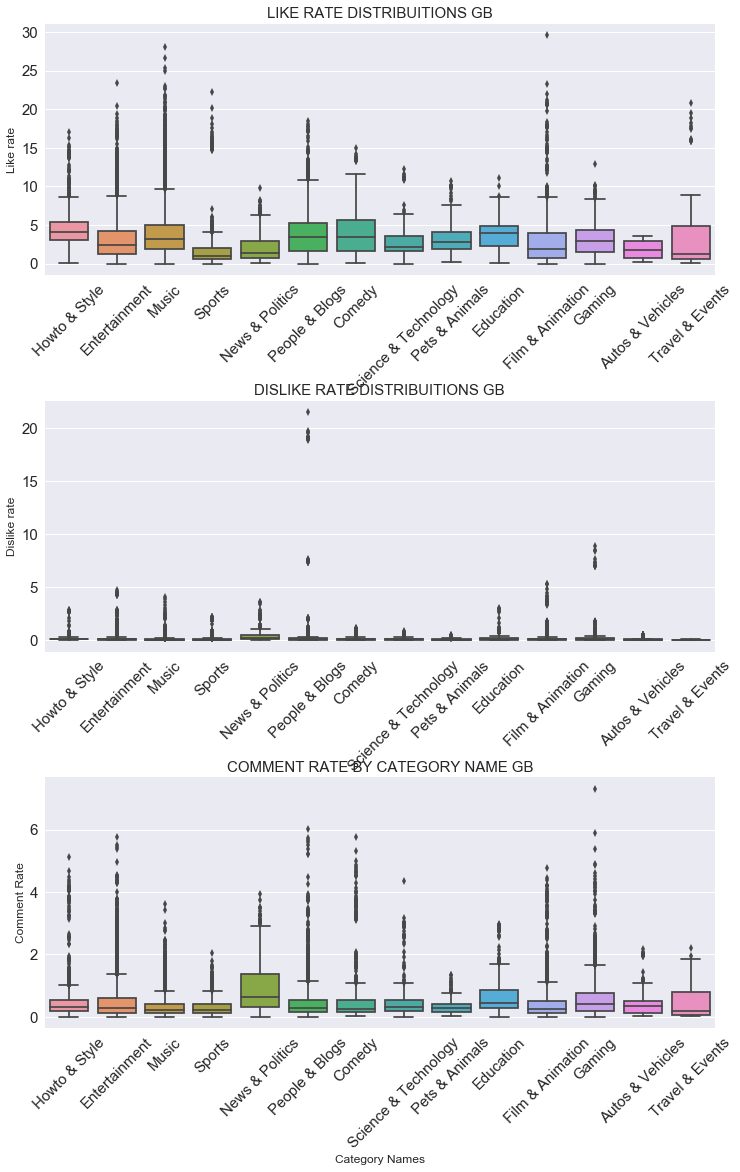

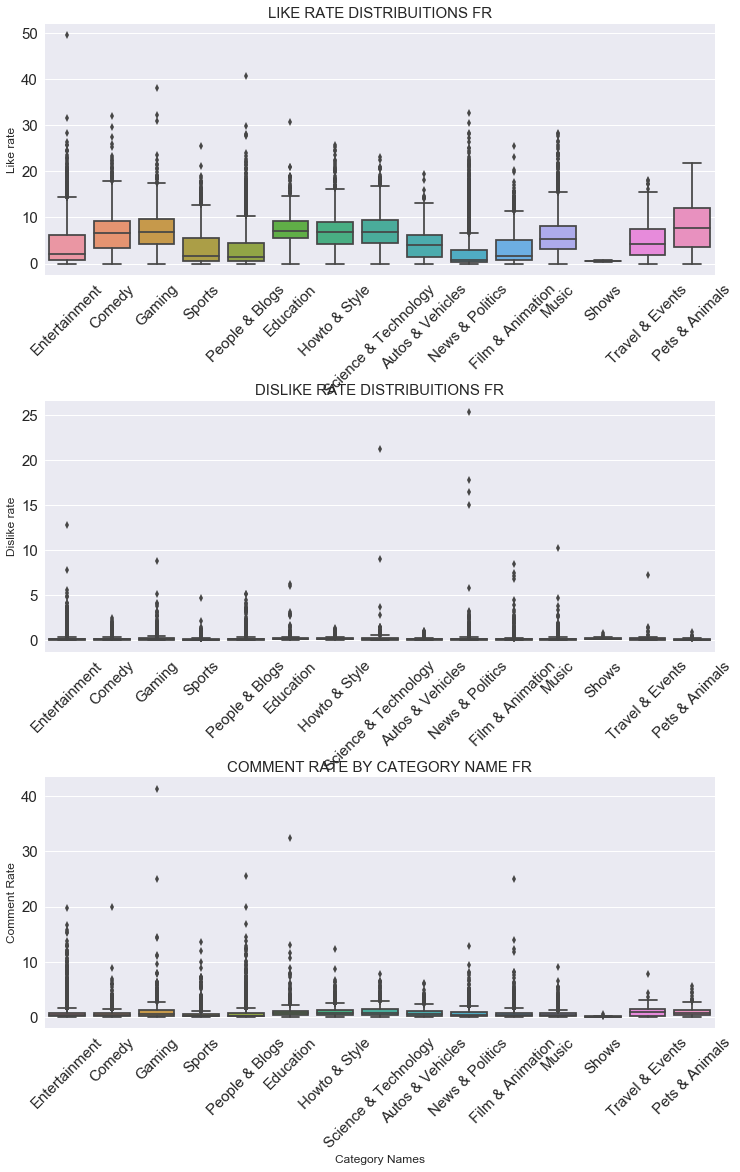

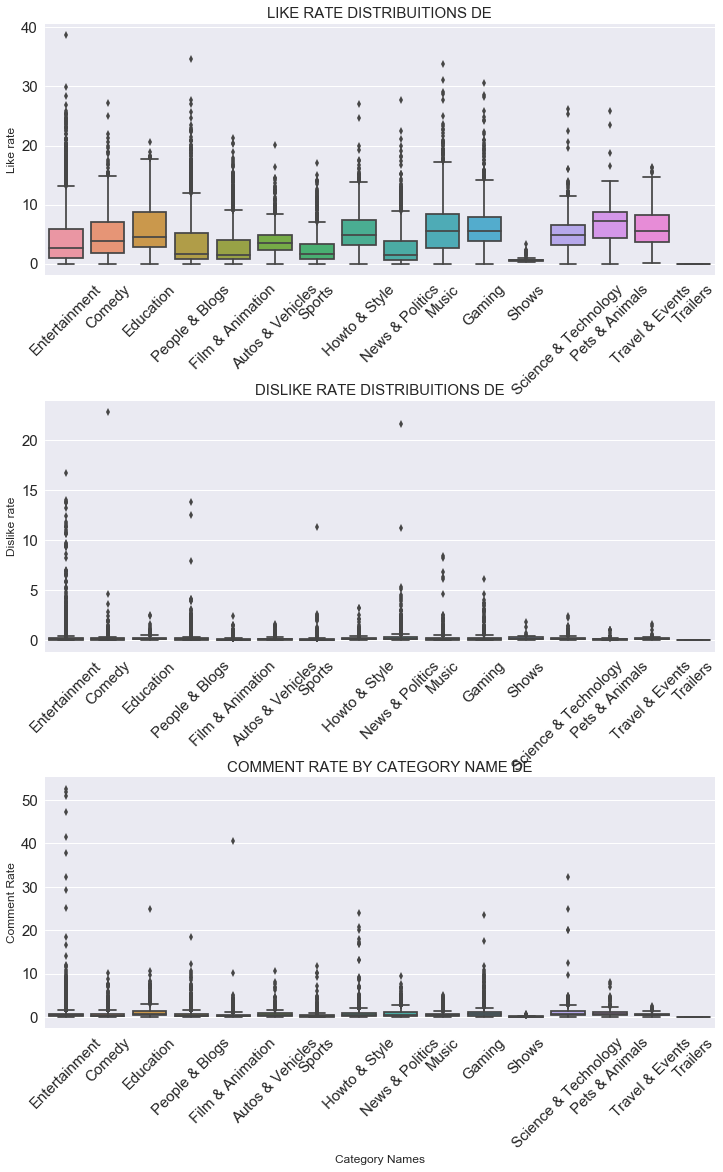

In [121]:
for cntry in df_videos.country.unique():
    
    tmp = df_videos[df_videos.country == cntry]

    plt.figure(figsize = (12,18))

    plt.subplot(311)
    g= sns.boxplot(x='snippet.title',y='like_rate',  data=tmp)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    g.set_title("LIKE RATE DISTRIBUITIONS " + cntry, fontsize=15)
    g.set_xlabel("", fontsize=12)
    g.set_ylabel("Like rate", fontsize=12)

    plt.subplot(312)
    g1= sns.boxplot(x='snippet.title',y='dislike_rate', data=tmp)
    g1.set_xticklabels(g.get_xticklabels(),rotation=45)
    g1.set_title("DISLIKE RATE DISTRIBUITIONS " + cntry, fontsize=15)
    g1.set_xlabel("", fontsize=12)
    g1.set_ylabel("Dislike rate", fontsize=12)

    plt.subplot(313)
    g2= sns.boxplot(x='snippet.title',y='comment_rate', data=tmp)
    g2.set_xticklabels(g.get_xticklabels(),rotation=45)
    g2.set_title("COMMENT RATE BY CATEGORY NAME " + cntry, fontsize=15)
    g2.set_xlabel("Category Names", fontsize=12)
    g2.set_ylabel("Comment Rate", fontsize=12)

    plt.subplots_adjust(wspace = 0.2, hspace = 0.5,top = 0.9)

    plt.show()

cat_df_gb = videos_all[videos_all['Country']=='GB']['category'].value_counts().reset_index()

video_level['views_min_dt'] = video_level.views_min_dt.dt.to_period('Q')
tmp = video_level.groupby(['category','views_min_dt']).views_ratio.median()
_ = tmp.unstack().plot(kind='bar')

hour_grp = df_videos.groupby('publish_hour')[metrics].sum()
hour_grp.reset_index(inplace=True)

Analysis : Users like videos from which CATEGORY the most?

In [122]:
tmp = df_videos.groupby(['country', 'video_id'])[['likes', 'views', 'dislikes', 'comment_count']].sum().reset_index()

In [123]:
tmp

country     video_id      likes        views  dislikes  comment_count
0      CA      --wOJ2VyKDI  569.0      133631.0     214.0     1513.0       
1      CA      -0DjA_r32uQ  2190.0     57494.0      62.0      768.0        
2      CA      -0F7AFzWXik  152.0      6070.0       108.0     205.0        
3      CA      -0NhqVYR4UY  1162.0     147706.0     74.0      591.0        
4      CA      -0QvjiG4sYM  3453.0     644927.0     1016.0    4647.0       
5      CA      -0XP8UXesHg  141.0      43056.0      6.0       69.0         
6      CA      -0qe75Q5vOg  3474.0     98160.0      46.0      259.0        
7      CA      -10X8LZxvOE  489.0      18484.0      6.0       29.0         
8      CA      -195_1aDUyc  65562.0    894930.0     667.0     6232.0       
9      CA      -2ZDiW0dgIw  0.0        31275.0      0.0       208.0        
10     CA      -2fmOkN6KH4  9748.0     342238.0     443.0     1373.0       
11     CA      -2nHrtXYXh4  23134.0    344712.0     407.0     4421.0       
12     CA      -2yP-zSyGEM  647.0      321826.0     123.0     245.0        
13     CA      -339h1pPm0k  8871.0     341665.0     207.0     1426.0       
14     CA      -3c-V5K2p88  5259.0     902072.0     3218.0    2857.0       
15     CA      -3t6yONlGG4  1234.0     153229.0     122.0     65.0         
16     CA      -4469zeATws  25937.0    739908.0     873.0     4162.0       
17     CA      -4Ffqg9Fvew  1155.0     63945.0      100.0     811.0        
18     CA      -4QP0JZyLAQ  1170.0     93013.0      44.0      108.0        
19     CA      -4sU_AhRPY0  129379.0   5771537.0    1329.0    4088.0       
20     CA      -55OlnWP3eI  624.0      86745.0      94.0      0.0          
21     CA      -59U4Bgn8V0  71616.0    1049467.0    626.0     3238.0       
22     CA      -5CyPycP91Y  5004.0     367835.0     525.0     1647.0       
23     CA      -5uebIQorsg  102993.0   6596307.0    2076.0    15429.0      
24     CA      -6b65coGHRY  23169.0    2189646.0    2448.0    2029.0       
25     CA      -6bXcufSfKo  5233.0     343021.0     443.0     842.0        
26     CA      -6rP8FO_Vwc  276393.0   13060778.0   35237.0   36866.0      
27     CA      -7AZX5Xtiks  22962.0    518719.0     566.0     1709.0       
28     CA      -7NTXrELrTY  9106.0     280079.0     284.0     964.0        
29     CA      -7UzyXO-mzk  85803.0    2472838.0    1122.0    12901.0      
...    ..              ...      ...          ...       ...        ...      
66293  US      zUrDUxh5xS0  91567.0    1726259.0    2511.0    11008.0      
66294  US      zUrib9ZbraY  134436.0   5636615.0    3927.0    7076.0       
66295  US      zWrMvW7S3tg  807185.0   11288629.0   44384.0   103793.0     
66296  US      zYWt2mnalP8  8388.0     160477.0     691.0     950.0        
66297  US      zYX1bgxEAhw  185342.0   6692044.0    7813.0    12878.0      
66298  US      zYlW81GZYug  679348.0   8930739.0    3138.0    32107.0      
66299  US      zZ9FciUx6gs  92622.0    2163388.0    4480.0    7478.0       
66300  US      zbV1zyg_4qU  579.0      19420.0      25.0      192.0        
66301  US      zbtyaKAMDdk  389897.0   9681377.0    4628.0    19923.0      
66302  US      zeO4C8e4pjw  119279.0   3817650.0    3637.0    12073.0      
66303  US      zeQaJGkFyqQ  9.0        748.0        0.0       0.0          
66304  US      zg5lIBmmeRc  1240.0     470211.0     796.0     1538.0       
66305  US      ziLNTsTPL4k  88567.0    935079.0     1091.0    4223.0       
66306  US      zi_6oaQyckM  4077514.0  71146335.0   211821.0  256194.0     
66307  US      zjgZuuE8OVc  209674.0   2708371.0    1569.0    8605.0       
66308  US      zkG4Xpz6t68  3865460.0  122400297.0  704716.0  489833.0     
66309  US      zkrq7Kpd1so  0.0        1648886.0    0.0       548.0        
66310  US      zq0T7ye-Pn4  4275.0     180064.0     164.0     395.0        
66311  US      zsbT6NMUrSk  6601.0     791119.0     536.0     3296.0       
66312  US      zslYmBRhdOM  16421.0    142863.0     171.0     4443.0       
66313  US      zsoh0Y_VXdY  135267.0   7334058.0    49

In [125]:
tmp['like_rate'] =  tmp ['likes'] / tmp['views'] * 100
tmp['dislike_rate'] =  tmp ['dislikes'] / tmp['views'] * 100
tmp['comment_rate'] =  tmp ['comment_count'] / tmp['views'] * 100

In [126]:
np.mean(tmp.like_rate[tmp.country == 'GB'])

3.417552639761049

In [127]:
np.mean(tmp.like_rate[tmp.country == 'US'])

3.2041154606564204

In [128]:

t_test = ttest_ind(tmp.like_rate[tmp.country == 'GB'],tmp.like_rate[tmp.country == 'US'])

print("As we have found a p-value of %  F < 0.025 (two-tailed hypothesis), we can reject the null hypothesis that \n\
the UK likes rate  and GB likes rate means are statisticaly significant different" % t_test[1])

As we have found a p-value of  0.001241 < 0.025 (two-tailed hypothesis), we can reject the null hypothesis that 
the UK likes rate  and GB likes rate means are statisticaly significant different


In [130]:
videos = df_videos.copy()

In [131]:
videos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142095 entries, 0 to 142094
Data columns (total 35 columns):
Country                   142095 non-null object
Row ID                    142095 non-null int64
video_id                  142095 non-null object
trending_date             142095 non-null datetime64[ns]
title                     142095 non-null object
channel_title             142095 non-null object
category_id               142095 non-null int64
publish_time              142095 non-null datetime64[ns]
tags                      142095 non-null object
likes                     142095 non-null int32
dislikes                  142095 non-null int32
comment_count             142095 non-null int32
thumbnail_link            142095 non-null object
comments_disabled         142095 non-null object
ratings_disabled          142095 non-null object
video_error_or_removed    142095 non-null object
description               142095 non-null object
publish_date              142095 non-null obj

In [132]:
# videos.info

In [144]:
# videos.sample(1)
# video_id  :group by
# trending_date   : count trending days
# title   : wrd count 
# title :if capital letters are more than small
# title : has number 
# title : has puncuations or not

# channel_title  : count of posted videos
# channel_title  : average number of trending days per posted video

# publish_time : how old is the video in days

# tags :number of tags "|"

# likes
# dislikes
# comment_count
# comments_disabled : binary 0 or 1
# ratings_disabled  : binary 0 or 1

# description  : word count
# description  : http count
# description  : has #
# description  : number of sentences 

# snippet.title

# views
# prc_likes
# prc_dislikes
# prc_comments


In [199]:
df_cluster = videos.groupby(videos.video_id)['trending_date'].count().reset_index()
df_cluster.columns = ['video_id', 'days_trending']

df_channel_title = videos.groupby(videos.channel_title)['video_id'].count().reset_index()
df_channel_title.columns = ['channel_title', 'num_of_videos']

tmp = videos.groupby([videos.channel_title, videos.video_id])['Row ID'].count().reset_index().\
groupby('channel_title')['Row ID'].mean().reset_index()
tmp.columns = ['channel_title', 'Average_trending_days']

df_channel_title = pd.merge(df_channel_title, tmp)
del tmp

videos = pd.merge(videos, df_channel_title)
del df_channel_title

In [173]:
%%time

videos['title_len'] = videos.title.apply(lambda x: len(x.split(" ")))
videos['title_upper_case_prc'] = videos.title.apply(lambda x: 100 * len(re.findall(r'[A-Z]',x)) / len(x))
videos['title_count_letters'] = videos.title.apply(lambda x: len(x))
videos['title_has_numer'] = videos.title.apply(lambda x: (len(re.findall(r'[0-9]',x)) > 0) * 1)                 
videos['title__hash_exclamation'] = videos.title.apply(lambda x: len(re.findall(r'[#!]',x)) ) 


videos['description_word_count'] = videos.description.apply(lambda x: len(x.split(" ")))
videos['description_http_count'] = videos.description.apply(lambda x: len(re.findall(r'http',x)) )
videos['description_hashtag_count'] = videos.description.apply(lambda x: len(re.findall(r'[#]',x)) ) 


Wall time: 1.56 s


In [ ]:
basedate = pandas.Timestamp('2011-11-25')
df['time since'] = df.apply(lambda x: (x.name.to_datetime() - basedate).days, axis=1)

In [218]:
basedate = pd.to_datetime('2018-05-01')
print(type(basedate))
print(type(videos.publish_date[0]))

print(type(basedate.date)) 
print(type(basedate.date()))
videos['days_old'] = videos.publish_date.apply(lambda x: basedate.date() - x)

<class 'pandas._libs.tslib.Timestamp'>
<class 'datetime.date'>
<class 'builtin_function_or_method'>
<class 'datetime.date'>


In [223]:
type(videos.days_old[0])

pandas._libs.tslib.Timedelta

In [228]:
videos['days_old'] = videos.days_old.dt.days

In [230]:
videos['number_of_tags'] = videos.tags.apply(lambda x: len(x.split("|")))

In [248]:
videos['comments_disabled'] = videos.comments_disabled * 1
videos['ratings_disabled'] = videos.ratings_disabled * 1

In [240]:
type(videos.comments_disabled[0])

bool

In [244]:
# False + 0

0

In [ ]:
# pd.get_dummies(videos['snippet.title'])

In [275]:
videos = pd.concat([videos, pd.get_dummies(videos['snippet.title'])], axis=1)

In [278]:
videos.columns

Index(['Country', 'Row ID', 'video_id', 'trending_date', 'title',
       'channel_title', 'category_id', 'publish_time', 'tags', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description',
       'publish_date', 'publish_month', 'publish_day', 'publish_hour', 'id',
       'snippet.title', 'country', 'views', 'prc_likes', 'prc_dislikes',
       'prc_comments', 'likes_log', 'views_log', 'dislikes_log', 'comment_log',
       'like_rate', 'dislike_rate', 'comment_rate', 'title_len',
       'title_upper_case_prc', 'title_count_letters', 'title_has_numer',
       'title__hash_exclamation', 'num_of_videos', 'Average_trending_days',
       'days_old', 'number_of_tags', 'Autos & Vehicles', 'Comedy', 'Education',
       'Entertainment', 'Film & Animation', 'Gaming', 'Howto & Style', 'Music',
       'News & Politics', 'Nonprofits & Activism', 'People & Blogs',
       'Pets & Animals', 'Science & Technology

In [339]:
final_features_sum= ['likes',
       'dislikes', 'comment_count', 'comments_disabled',
       'ratings_disabled', 'views', 'like_rate', 'dislike_rate', 'comment_rate', 'title_len',
       'title_upper_case_prc', 'title_count_letters', 'title_has_numer',
       'title__hash_exclamation', 'num_of_videos', 'Average_trending_days','number_of_tags']

final_features_mean=[ 'days_old',  'Autos & Vehicles', 'Comedy', 'Education',
       'Entertainment', 'Film & Animation', 'Gaming', 'Howto & Style', 'Music',
       'News & Politics', 'Nonprofits & Activism', 'People & Blogs',
       'Pets & Animals', 'Science & Technology', 'Shows', 'Sports', 'Trailers',
       'Travel & Events']

In [340]:
df1 = videos.groupby(videos.video_id)[final_features_sum].sum()
df2 = videos.groupby(videos.video_id)[final_features_mean].mean()

In [328]:
df2

days_old  Autos & Vehicles  Comedy  Education  Entertainment  \
video_id                                                                    
--2K8l6BWfw  57.0      0.0               0.0     0.0        0.0             
--728h8mnDY  147.0     0.0               0.0     0.0        0.0             
--FcOKEq9gU  31.0      0.0               0.0     0.0        0.0             
--I0aj8MUdU  86.0      0.0               0.0     0.0        1.0             
--mmyQlx91I  939.0     0.0               1.0     0.0        0.0             
--moh3hSPpY  119.0     0.0               0.0     0.0        1.0             
--uXQQ0h-yQ  3445.0    0.0               0.0     0.0        1.0             
--wOJ2VyKDI  78.0      0.0               0.0     0.0        0.0             
--yNosdyM4c  27.0      0.0               0.0     0.0        1.0             
-0-KcJkKjqA  156.0     1.0               0.0     0.0        0.0             
-00L3P74_mg  68.0      0.0               0.0     0.0        0.0             
-01JK3TRtIo  156.0     0.0               0.0     0.0        0.0             
-01MUE3GK7U  110.0     0.0               0.0     0.0        0.0             
-06RYo6s6qQ  58.0      0.0               0.0     0.0        0.0             
-0DjA_r32uQ  78.0      0.0               0.0     1.0        0.0             
-0F7AFzWXik  72.0      0.0               0.0     0.0        0.0             
-0NYY8cqdiQ  92.0      0.0               0.0     0.0        1.0             
-0NhqVYR4UY  60.0      0.0               0.0     0.0        0.0             
-0OrGpL_JyE  78.0      0.0               0.0     0.0        0.0             
-0QvjiG4sYM  26.0      0.0               0.0     0.0        0.0             
-0XP8UXesHg  98.0      0.0               0.0     0.0        1.0             
-0fTk5Jpi2w  162.0     0.0               0.0     0.0        0.0             
-0ilM33s70k  169.0     0.0               0.0     0.0        1.0             
-0qe75Q5vOg  128.0     0.0               0.0     0.0        1.0             
-0zqv290I5I  35.0      0.0               0.0     0.0        0.0             
-1-qbpZ-N3U  127.0     0.0               0.0     0.0        0.0             
-10X8LZxvOE  116.0     0.0               0.0     0.0        1.0             
-1446KeS7aA  130.0     0.0               0.0     0.0        0.0             
-18jiSget8s  147.0     0.0               0.0     0.0        1.0             
-195_1aDUyc  119.0     0.0               0.0     0.0        0.0             
...            ...     ...               ...     ...        ...             
zxqE7iKvKh4  109.0     0.0               0.0     0.0        0.0             
zxuvr9tN924  171.0     0.0               0.0     0.0        1.0             
zy0b9e40tK8  173.0     0.0               0.0     0.0        1.0             
zy9mKHH0ZQY  81.0      0.0               0.0     0.0        0.0             
zyFrNZKAYCk  59.0      0.0               0.0     0.0        0.0             
zyH5x08KdzA  138.0     0.0               0.0     0.0        0.0             
zyPEekHfAkc  102.0     0.0               0.0     0.0        0.0             
zyUHrM5AojM  150.0     0.0               0.0     0.0        0.0             
zyWCABSzS8I  25.0      0.0               0.0     0.0        1.0             
zy_8tFn2ykk  70.0      0.0               1.0     0.0        0.0             
zybCWUzWHUQ  157.0     0.0               0.0     0.0        0.0             
zycRFTif1TQ  164.0     0.0               0.0     0.0        1.0             
zyeLmzVelAA  147.0     0.0               0.0     0.0        1.0             
zylunvHhn9A  55.0      1.0               0.0     0.0        0.0             
zymZUKAY1_c  77.0      0.0               0.0     0.0        1.0             
zyzuut5pZDg  42.0      0.0               0.0     0.0        1.0             
zz-RpiUFY-I  62.0      0.0               0.0     0.0        0.0             
zz0YBj12gik  54.0      0.0               0.0     0.0        0.0             
zz2ZSsUUbFs  42.0      0.0               0.0     0.0        1.0             
zzCQbYn4U

In [341]:
final_features_all = pd.concat([df1, df2], axis=1)

In [330]:
final_features_all.head()

likes  dislikes  comment_count     views  like_rate  \
video_id                                                            
--2K8l6BWfw  694.0   4.0       34.0           4822.0    14.392368   
--728h8mnDY  4681.0  93.0      440.0          68201.0   13.861817   
--FcOKEq9gU  214.0   15.0      24.0           8354.0    2.561647    
--I0aj8MUdU  1254.0  196.0     52.0           334081.0  1.135819    
--mmyQlx91I  1835.0  29.0      100.0          245146.0  0.748534    

             dislike_rate  comment_rate  title_len  title_upper_case_prc  \
video_id                                                                   
--2K8l6BWfw  0.082953      0.705102      6          12.500000              
--728h8mnDY  0.275515      1.276935      6          40.000000              
--FcOKEq9gU  0.179555      0.287288      7          80.851064              
--I0aj8MUdU  0.177096      0.046585      42         12.271805              
--mmyQlx91I  0.011830      0.040792      18         7.070707               

             title_count_letters  title_has_numer  title__hash_exclamation  \
video_id                                                                     
--2K8l6BWfw  32                   1                1                         
--728h8mnDY  30                   0                0                         
--FcOKEq9gU  47                   1                0                         
--I0aj8MUdU  194                  3                3                         
--mmyQlx91I  99                   0                0                         

             num_of_videos  Average_trending_days  number_of_tags  days_old  \
video_id                                                                      
--2K8l6BWfw  11             1.222222               9               57.0       
--728h8mnDY  114            3.000000               12              147.0      
--FcOKEq9gU  93             1.044944               47              31.0       
--I0aj8MUdU  225            6.428571               18              86.0       
--mmyQlx91I  1              1.000000               5               939.0      

             Autos & Vehicles  Comedy  Education  Entertainment  \
video_id                                                          
--2K8l6BWfw  0.0               0.0     0.0        0.0             
--728h8mnDY  0.0               0.0     0.0        0.0             
--FcOKEq9gU  0.0               0.0     0.0        0.0             
--I0aj8MUdU  0.0               0.0     0.0        1.0             
--mmyQlx91I  0.0               1.0     0.0        0.0             

             Film & Animation  Gaming  Howto & Style  Music  News & Politics  \
video_id                                                                       
--2K8l6BWfw  0.0               0.0     0.0            0.0    0.0               
--728h8mnDY  0.0               0.0     1.0            0.0    0.0               
--FcOKEq9gU  0.0               0.0     1.0            0.0    0.0               
--I0aj8MUdU  0.0               0.0     0.0            0.0    0.0               
--mmyQlx91I  0.0               0.0     0.0            0.0    0.0               

             Nonprofits & Activism  People & Blogs  Pets & Animals  \
video_id                                                             
--2K8l6BWfw  0.0                    0.0             1.0              
--728h8mnDY  0.0                    0.0             0.0              
--FcOKEq9gU  0.0                    0.0             0.0              
--I0aj8MUdU  0.0                    0.0             0.0              
--mmyQlx91I  0.0                    0.0             0.0              

             Science & Technology  Shows  Sports  Trailers  Travel & Events  
video_id                                                                     
--2K8l6BWfw  0.0                   0.0    0.0     0.0       0.0              
--728h8mnDY  0.0                   0.0    0.0     0.0       0.0              
--FcOKEq9gU  0.0                   0.0    0.0     0.0       0.

In [331]:
final_features_all.describe()

likes      dislikes  comment_count         views     like_rate  \
count  5.662100e+04  5.662100e+04  5.662100e+04   5.662100e+04  56620.000000   
mean   1.150099e+05  6.729136e+03  1.289162e+04   4.063738e+06  9.543505       
std    1.568564e+06  2.823799e+05  2.335565e+05   7.319034e+07  19.901704      
min    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  0.000000       
25%    3.420000e+02  1.800000e+01  6.000000e+01   1.859200e+04  1.172141       
50%    2.169000e+03  9.800000e+01  3.450000e+02   1.031200e+05  4.081589       
75%    1.349500e+04  5.470000e+02  1.833000e+03   5.242450e+05  9.917970       
max    1.446994e+08  5.500132e+07  3.133931e+07   8.610382e+09  722.910030     

       dislike_rate  comment_rate     title_len  title_upper_case_prc  \
count  56620.000000  56620.000000  56621.000000  56621.000000           
mean   0.440397      1.415437      22.811907     56.403077              
std    2.721104      3.225776      37.092808     125.501590             
min    0.000000      0.000000      1.000000      0.000000               
25%    0.071600      0.198175      8.000000      10.000000              
50%    0.145041      0.575740      12.000000     20.000000              
75%    0.328852      1.438671      21.000000     59.574468              
max    485.124795    137.239060    800.000000    3965.217391            

       title_count_letters  title_has_numer  title__hash_exclamation  \
count  56621.000000         56621.000000     56621.000000              
mean   130.182635           0.993024         0.551156                  
std    208.637871           2.258718         2.081784                  
min    1.000000             0.000000         0.000000                  
25%    48.000000            0.000000         0.000000                  
50%    72.000000            0.000000         0.000000                  
75%    120.000000           1.000000         0.000000                  
max    4700.000000          64.000000        72.000000                 

       num_of_videos  Average_trending_days  number_of_tags      days_old  \
count  56621.000000   56621.000000           56621.000000    56621.000000   
mean   187.852263     15.726313              44.754632       104.354268     
std    601.434817     80.103404              93.153089       119.578662     
min    1.000000       1.000000               1.000000        24.000000      
25%    8.000000       1.062500               8.000000        62.000000      
50%    34.000000      1.725490               21.000000       98.000000      
75%    118.000000     5.052632               42.000000       136.000000     
max    15580.000000   3969.000000            2774.000000     4300.000000    

       Autos & Vehicles        Comedy     Education  Entertainment  \
count  56621.000000      56621.000000  56621.000000  56621.000000    
mean   0.020341          0.067734      0.024546      0.294910        
std    0.141131          0.251229      0.154712      0.455907        
min    0.000000          0.000000      0.000000      0.000000        
25%    0.000000          0.000000      0.000000      0.000000        
50%    0.000000          0.000000      0.000000      0.000000        
75%    0.000000          0.000000      0.000000      1.000000        
max    1.000000          1.000000      1.000000      1.000000        

       Film & Animation        Gaming  Howto & Style         Music  \
count  56621.000000      56621.000000  56621.000000   56621.000000   
mean   0.051543          0.038984      0.061178       0.063847       
std    0.221061          0.193525      0.239636       0.244405       
min    0.000000          0.000000      0.000000       0.000000       
25%    0.000000          0.000000      0.000000       0.000000       
50%    0.000000          0.000000      0.000000       0.000000       
75%    0.000000          0.000000      0.000000       0.000000       
max    1.000000          1.000000      1.000000       1.000000       

       News & Politics  Nonpro

In [277]:
videos.sample(2)

Country  Row ID     video_id trending_date  \
81349  CA      10394   MSpcdzwBatg 2018-01-05      
91943  GB      9794    iLZwZX39FXU 2018-01-02      

                                                                                                  title  \
81349  Logan Paul ROASTED by Dolan Twins! #DramaAlert RiceGum , PewDiePie , Jacksepticeye  & Much More!   
91943  Holly Holm vs Cris Cyborg Breakdown | HIGHLIGHTS | UFC 219                                         

      channel_title  category_id        publish_time  \
81349  DramaAlert    25          2018-01-02 23:38:39   
91943  UFC ON FOX    17          2017-12-31 08:09:48   

                                                                                                                                                                                                                                                                       tags  \
81349  #DramaAlert|"Drama"|"Alert"|"DramaAlert"|"keemstar"|"youtube news"|"logan paul"|"Dolan Twins"|"pewdiepie"|"ricegum"|"Jacksepticeye"|"the Dolan Twins"|"tanner fox"|"logang"|"jake paul"|"team 10"                                                                      
91943  ufc|"mma"|"fox sports"|"fox"|"fs1"|"ufc 219"|"holly holm"|"cris cyborg"|"highlights"|"title fight"|"vegas"|"khabib nurmagomedov"|"edson barboza"|"Holly Holm vs Cris Cyborg Breakdown"|"219"|"Nevada"|"Reno"|"Las Vegas"|"highlight"|"move of the fight"|"metro pcs"   

        likes  dislikes  comment_count  \
81349  133056  21772     43905           
91943  6811    1500      2775            

                                       thumbnail_link comments_disabled  \
81349  https://i.ytimg.com/vi/MSpcdzwBatg/default.jpg  0                  
91943  https://i.ytimg.com/vi/iLZwZX39FXU/default.jpg  0                  

      ratings_disabled video_error_or_removed  \
81349  0                False                   
91943  0                False                   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
81349  ► Follow for News! - https://twitter.com/KEEMSTAR\n\n► Follow for livestreams! - https://gaming.youtube.com/KEEMSTAR\n\n► KEEM Merch\nhttp://keem.shirtz.cool\n\n► USE CODE (KEEM)\nhttps://gfuel.com/pages/keemstar\n\nDollar in the Woods! (OUT NOW)\n► iTunes\nhttps://itunes.apple.com/us/album/dollar-in-the-woods-single/id1295414119https://itunes.apple.com/us/album/dollar-in-the-woods-single/id1295414119\n\n► Spotify \nhttps://open.spotify.com/track/3uUHoKWqPbJ5qoREGbguC9?si=v4CgSBBR\n\n► YouTube (Music Video)\nhttps://youtu.be/n38Qxi7TVWo\n\nAdpocalypse! (My New Game)\n► Apple (iOS)\nhttps://itunes.apple.com/us/app/the-adpocalypse/id1263621591\n\n► Android\nhttps://play.google.com/store/apps/details?id=com.projectorgames.howtogetahead                                                            

## Kmeans

In [332]:
df=(final_features_all-final_features_all.mean())/final_features_all.std()

In [333]:
df.isnull().sum()

likes                      0
dislikes                   0
comment_count              0
views                      0
like_rate                  1
dislike_rate               1
comment_rate               1
title_len                  0
title_upper_case_prc       0
title_count_letters        0
title_has_numer            0
title__hash_exclamation    0
num_of_videos              0
Average_trending_days      0
number_of_tags             0
days_old                   0
Autos & Vehicles           0
Comedy                     0
Education                  0
Entertainment              0
Film & Animation           0
Gaming                     0
Howto & Style              0
Music                      0
News & Politics            0
Nonprofits & Activism      0
People & Blogs             0
Pets & Animals             0
Science & Technology       0
Shows                      0
Sports                     0
Trailers                   0
Travel & Events            0
dtype: int64

In [334]:
df = df.fillna(0)

In [335]:
%%time

lista =[]
for k in range(1,20):
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(df.values)
    lista.append(kmeans.inertia_)

Wall time: 2min 3s


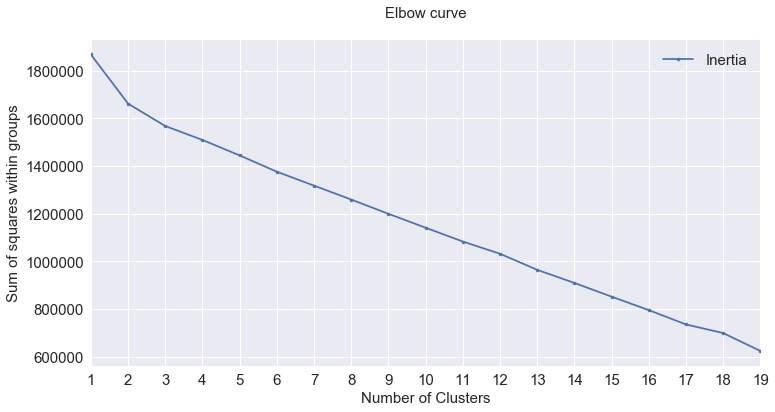

In [336]:
ax = pd.DataFrame({'Inertia': lista, 'ind': range(1, 20)}).set_index('ind').plot( marker='.', 
                                                                               figsize=(12,6))
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Sum of squares within groups')
plt.xticks(np.arange(1, 20, 1))
plt.grid(True, axis='x')
plt.title('Elbow curve\n')
plt.show()

In [ ]:
#sns.pairplot()

In [426]:
final_features_sum1= [ 'views', 'like_rate', 'Autos & Vehicles', 'Comedy', 'Education',
       'Entertainment', 'Film & Animation', 'Gaming', 'Howto & Style', 'Music',
       'News & Politics', 'Nonprofits & Activism', 'People & Blogs',
       'Pets & Animals', 'Science & Technology', 'Shows', 'Sports', 'Trailers',
       'Travel & Events']
        
#final_features_mean1=[ 'days_old']

In [427]:
df11 = videos.groupby(videos.video_id)[final_features_sum].sum()
#df21 = videos.groupby(videos.video_id)[final_features_mean].mean()

In [428]:
final_features_all_1 = df11

In [429]:
df=(final_features_all_1-final_features_all_1.mean())/final_features_all_1.std()

In [430]:
df = df.fillna(0)

In [389]:
%%time

lista =[]
for k in range(1,20):
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(df.values)
    lista.append(kmeans.inertia_)

Wall time: 1min 49s


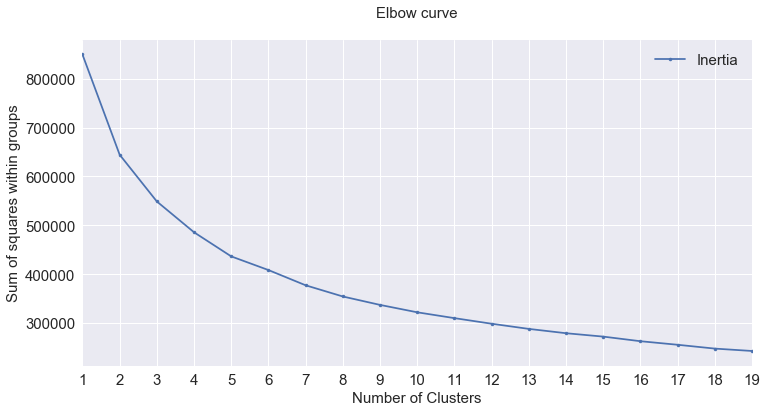

In [390]:
ax = pd.DataFrame({'Inertia': lista, 'ind': range(1, 20)}).set_index('ind').plot( marker='.', 
                                                                               figsize=(12,6))
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Sum of squares within groups')
plt.xticks(np.arange(1, 20, 1))
plt.grid(True, axis='x')
plt.title('Elbow curve\n')
plt.show()

In [502]:
pd.DataFrame({'Inertia': lista, 'ind': range(1, 20)}).set_index('ind')

Inertia
ind               
1    849297.000000
2    644376.879575
3    548798.459330
4    485795.444433
5    436501.183827
6    408600.187480
7    377433.094255
8    354547.719603
9    337360.577511
10   322226.438875
11   310306.588628
12   298864.532349
13   288306.121793
14   279464.264809
15   272544.979616
16   263124.617177
17   255854.282631
18   248027.076510
19   243177.340270

In [361]:
final_features_all.head()

likes  dislikes  comment_count     views  like_rate  \
video_id                                                            
--2K8l6BWfw  694.0   4.0       34.0           4822.0    14.392368   
--728h8mnDY  4681.0  93.0      440.0          68201.0   13.861817   
--FcOKEq9gU  214.0   15.0      24.0           8354.0    2.561647    
--I0aj8MUdU  1254.0  196.0     52.0           334081.0  1.135819    
--mmyQlx91I  1835.0  29.0      100.0          245146.0  0.748534    

             dislike_rate  comment_rate  title_len  title_upper_case_prc  \
video_id                                                                   
--2K8l6BWfw  0.082953      0.705102      6          12.500000              
--728h8mnDY  0.275515      1.276935      6          40.000000              
--FcOKEq9gU  0.179555      0.287288      7          80.851064              
--I0aj8MUdU  0.177096      0.046585      42         12.271805              
--mmyQlx91I  0.011830      0.040792      18         7.070707               

             title_count_letters  title_has_numer  title__hash_exclamation  \
video_id                                                                     
--2K8l6BWfw  32                   1                1                         
--728h8mnDY  30                   0                0                         
--FcOKEq9gU  47                   1                0                         
--I0aj8MUdU  194                  3                3                         
--mmyQlx91I  99                   0                0                         

             num_of_videos  Average_trending_days  number_of_tags  days_old  \
video_id                                                                      
--2K8l6BWfw  11             1.222222               9               57.0       
--728h8mnDY  114            3.000000               12              147.0      
--FcOKEq9gU  93             1.044944               47              31.0       
--I0aj8MUdU  225            6.428571               18              86.0       
--mmyQlx91I  1              1.000000               5               939.0      

             Autos & Vehicles  Comedy  Education  Entertainment  \
video_id                                                          
--2K8l6BWfw  0.0               0.0     0.0        0.0             
--728h8mnDY  0.0               0.0     0.0        0.0             
--FcOKEq9gU  0.0               0.0     0.0        0.0             
--I0aj8MUdU  0.0               0.0     0.0        1.0             
--mmyQlx91I  0.0               1.0     0.0        0.0             

             Film & Animation  Gaming  Howto & Style  Music  News & Politics  \
video_id                                                                       
--2K8l6BWfw  0.0               0.0     0.0            0.0    0.0               
--728h8mnDY  0.0               0.0     1.0            0.0    0.0               
--FcOKEq9gU  0.0               0.0     1.0            0.0    0.0               
--I0aj8MUdU  0.0               0.0     0.0            0.0    0.0               
--mmyQlx91I  0.0               0.0     0.0            0.0    0.0               

             Nonprofits & Activism  People & Blogs  Pets & Animals  \
video_id                                                             
--2K8l6BWfw  0.0                    0.0             1.0              
--728h8mnDY  0.0                    0.0             0.0              
--FcOKEq9gU  0.0                    0.0             0.0              
--I0aj8MUdU  0.0                    0.0             0.0              
--mmyQlx91I  0.0                    0.0             0.0              

             Science & Technology  Shows  Sports  Trailers  Travel & Events  \
video_id                                                                      
--2K8l6BWfw  0.0                   0.0    0.0     0.0       0.0               
--728h8mnDY  0.0                   0.0    0.0     0.0       0.0               
--FcOKEq9gU  0.0                   0.0    0.0     0.0     

In [491]:
kmeans = KMeans(n_clusters=50)
kmeans.fit(df.values)

final_features_all['cluster'] = kmeans.labels_

df_clu_group_describe = final_features_all.groupby('cluster').describe(percentiles=[.1, .25, .5]).T
df_clu_group_describe.index.names = ['features', 'metric']
result = df_clu_group_describe.T
result

features Autos & Vehicles                                               \
metric              count      mean       std  min  10%  25%  50%  max   
cluster                                                                  
0         2561.0           0.010543  0.102155  0.0  0.0  0.0  0.0  1.0   
1         82.0             0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
2         1.0              0.000000 NaN        0.0  0.0  0.0  0.0  0.0   
3         32.0             0.031250  0.176777  0.0  0.0  0.0  0.0  1.0   
4         28913.0          0.024539  0.154690  0.0  0.0  0.0  0.0  1.0   
5         24.0             0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
6         1.0              0.000000 NaN        0.0  0.0  0.0  0.0  0.0   
7         94.0             0.010638  0.103142  0.0  0.0  0.0  0.0  1.0   
8         302.0            0.006623  0.081244  0.0  0.0  0.0  0.0  1.0   
9         1.0              0.000000 NaN        0.0  0.0  0.0  0.0  0.0   
10        923.0            0.019502  0.138355  0.0  0.0  0.0  0.0  1.0   
11        245.0            0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
12        1.0              0.000000 NaN        0.0  0.0  0.0  0.0  0.0   
13        37.0             0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
14        43.0             0.023256  0.152499  0.0  0.0  0.0  0.0  1.0   
15        4.0              0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
16        246.0            0.015891  0.123954  0.0  0.0  0.0  0.0  1.0   
17        115.0            0.008696  0.093250  0.0  0.0  0.0  0.0  1.0   
18        23.0             0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
19        51.0             0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
20        18.0             0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
21        21.0             0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
22        7724.0           0.018686  0.135317  0.0  0.0  0.0  0.0  1.0   
23        39.0             0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
24        244.0            0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
25        1.0              0.000000 NaN        0.0  0.0  0.0  0.0  0.0   
26        4274.0           0.024333  0.154099  0.0  0.0  0.0  0.0  1.0   
27        3.0              0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
28        1142.0           0.004378  0.066053  0.0  0.0  0.0  0.0  1.0   
29        112.0            0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
30        20.0             0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
31        231.0            0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
32        35.0             0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
33        8.0              0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
34        674.0            0.007418  0.085874  0.0  0.0  0.0  0.0  1.0   
35        53.0             0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
36        30.0             0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
37        7.0              0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
38        108.0            0.018519  0.135445  0.0  0.0  0.0  0.0  1.0   
39        1.0              0.000000 NaN        0.0  0.0  0.0  0.0  0.0   
40        1.0              0.000000 NaN        0.0  0.0  0.0  0.0  0.0   
41        475.0            0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
42        4448.0           0.020908  0.143093  0.0  0.0  0.0  0.0  1.0   
43        7.0              0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
44        1708.0           0.011124  0.104913  0.0  0.0  0.0  0.0  1.0   
45        1.0              0.000000 NaN        0.0  0.0  0.0  0.0  0.0   
46        2.0              0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
47        786.0            0.007634  0.087092  0.0  0.0  0.0  0.0  1.0   
48        622.0            0.014469  0.119512  0.0  0.0  0.0  0.0  1.0   
49        127.0            0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   

features Average_trending_days                                         \
metr

In [436]:
final_features_all.cluster.unique()

array([ 1, 21, 16, 31, 49, 44, 12,  0,  4, 42, 26, 28, 17, 38, 48,  3, 30,
       45, 27, 41, 40, 25,  8,  6, 18, 15, 29, 47, 22, 24, 20,  9, 46, 10,
       34, 43,  5, 33, 37, 32, 23, 39,  2, 19,  7, 14, 11, 35, 13, 36], dtype=int64)

In [437]:
cls.cluster.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], dtype=int64)

In [518]:
cls = result.iloc[:, 0]
cls = (cls > 1200).reset_index()
cls.columns = ['cluster', 'keep']

cls['cluster_final'] = cls.apply(lambda x: x.cluster if x.keep else sum(cls.keep), axis=1)
cls['cluster_final'] = cls.cluster_final.rank(method='dense').astype(int)

In [519]:
cls.cluster_final.unique()

array([1, 3, 2, 4, 5, 6, 7], dtype=int64)

In [526]:
df_final = pd.merge(final_features_all, cls[['cluster', 'cluster_final']], how='left')

In [527]:
df_final.cluster_final.unique()

array([4, 2, 5, 1, 3, 6, 7], dtype=int64)

In [528]:
df_final.head()

likes  dislikes  comment_count     views  like_rate  dislike_rate  \
0  694.0   4.0       34.0           4822.0    14.392368  0.082953       
1  4681.0  93.0      440.0          68201.0   13.861817  0.275515       
2  214.0   15.0      24.0           8354.0    2.561647   0.179555       
3  1254.0  196.0     52.0           334081.0  1.135819   0.177096       
4  1835.0  29.0      100.0          245146.0  0.748534   0.011830       

   comment_rate  title_len  title_upper_case_prc  title_count_letters  \
0  0.705102      6          12.500000             32                    
1  1.276935      6          40.000000             30                    
2  0.287288      7          80.851064             47                    
3  0.046585      42         12.271805             194                   
4  0.040792      18         7.070707              99                    

   title_has_numer  title__hash_exclamation  num_of_videos  \
0  1                1                        11              
1  0                0                        114             
2  1                0                        93              
3  3                3                        225             
4  0                0                        1               

   Average_trending_days  number_of_tags  days_old  Autos & Vehicles  Comedy  \
0  1.222222               9               57.0      0.0               0.0      
1  3.000000               12              147.0     0.0               0.0      
2  1.044944               47              31.0      0.0               0.0      
3  6.428571               18              86.0      0.0               0.0      
4  1.000000               5               939.0     0.0               1.0      

   Education  Entertainment  Film & Animation  Gaming  Howto & Style  Music  \
0  0.0        0.0            0.0               0.0     0.0            0.0     
1  0.0        0.0            0.0               0.0     1.0            0.0     
2  0.0        0.0            0.0               0.0     1.0            0.0     
3  0.0        1.0            0.0               0.0     0.0            0.0     
4  0.0        0.0            0.0               0.0     0.0            0.0     

   News & Politics  Nonprofits & Activism  People & Blogs  Pets & Animals  \
0  0.0              0.0                    0.0             1.0              
1  0.0              0.0                    0.0             0.0              
2  0.0              0.0                    0.0             0.0              
3  0.0              0.0                    0.0             0.0              
4  0.0              0.0                    0.0             0.0              

   Science & Technology  Shows  Sports  Trailers  Travel & Events  cluster  \
0  0.0                   0.0    0.0     0.0       0.0              22        
1  0.0                   0.0    0.0     0.0       0.0              22        
2  0.0                   0.0    0.0     0.0       0.0              4         
3  0.0                   0.0    0.0     0.0       0.0              26        
4  0.0                   0.0    0.0     0.0       0.0              4         

   cluster_final  
0  4              
1  4              
2  2              
3  5              
4  2

In [529]:
df_clu_group_describe = df_final.groupby('cluster_final').describe(percentiles=[.1, .25, .5]).T
df_clu_group_describe.index.names = ['features', 'metric']
results = df_clu_group_describe.T
results

features      Autos & Vehicles                                               \
metric                   count      mean       std  min  10%  25%  50%  max   
cluster_final                                                                 
1              2561.0           0.010543  0.102155  0.0  0.0  0.0  0.0  1.0   
2              28913.0          0.024539  0.154690  0.0  0.0  0.0  0.0  1.0   
3              6993.0           0.007852  0.088202  0.0  0.0  0.0  0.0  1.0   
4              7724.0           0.018686  0.135317  0.0  0.0  0.0  0.0  1.0   
5              4274.0           0.024333  0.154099  0.0  0.0  0.0  0.0  1.0   
6              4448.0           0.020908  0.143093  0.0  0.0  0.0  0.0  1.0   
7              1708.0           0.011124  0.104913  0.0  0.0  0.0  0.0  1.0   

features      Average_trending_days                                         \
metric                        count        mean         std       min  10%   
cluster_final                                                                
1              2561.0                18.218467   19.122953   2.000000  4.0   
2              28913.0               1.740521    1.807825    1.000000  1.0   
3              6993.0                101.590997  207.902667  1.000000  4.6   
4              7724.0                3.078990    4.345943    1.000000  1.0   
5              4274.0                3.666783    3.401122    1.000000  1.0   
6              4448.0                4.711897    3.203975    2.000000  2.5   
7              1708.0                13.243613   10.233217   3.109756  5.5   

features                                           Comedy                      \
metric               25%        50%          max    count      mean       std   
cluster_final                                                                   
1              6.750000   11.689655  169.000000   2561.0   0.107780  0.309998   
2              1.000000   1.166667   49.000000    28913.0  0.049787  0.217489   
3              15.272727  39.666667  3969.000000  6993.0   0.113589  0.317208   
4              1.000000   1.333333   121.000000   7724.0   0.087390  0.282424   
5              1.333333   3.000000   56.250000    4274.0   0.082358  0.274942   
6              2.941176   4.000000   58.545455    4448.0   0.048336  0.214238   
7              7.408824   10.090909  108.000000   1708.0   0.048790  0.215190   

features                               Education                           \
metric         min  10%  25%  50%  max     count      mean       std  min   
cluster_final                                                               
1              0.0  0.0  0.0  0.0  1.0  2561.0    0.032800  0.178147  0.0   
2              0.0  0.0  0.0  0.0  1.0  28913.0   0.023017  0.149932  0.0   
3              0.0  0.0  0.0  0.0  1.0  6993.0    0.028791  0.167135  0.0   
4              0.0  0.0  0.0  0.0  1.0  7724.0    0.039228  0.194150  0.0   
5              0.0  0.0  0.0  0.0  1.0  4274.0    0.015442  0.123318  0.0   
6              0.0  0.0  0.0  0.0  1.0  4448.0    0.008993  0.094414  0.0   
7              0.0  0.0  0.0  0.0  1.0  1708.0    0.017564  0.131400  0.0   

features                          Entertainment                                \
metric         10%  25%  50%  max         count      mean       std  min  10%   
cluster_final                                                                   
1              0.0  0.0  0.0  1.0  2561.0        0.297566  0.456916  0.0  0.0   
2              0.0  0.0  0.0  1.0  28913.0       0.295778  0.456382  0.0  0.0   
3              0.0  0.0  0.0  1.0  6993.0        0.278166  0.447944  0.0  0.0   
4              0.0  0.0  0.0  1.0  7724.0        0.239751  0.426887  0.0  0.0   
5              0.0  0.0  0.0  1.0  4274.0        0.298549  0.457675  0.0  0.0   
6              0.0  0.0  0.0  1.0  4448.0        0.364059  0.480999  0.0  0.0   
7              0.0  0.0  0.0  1.0  1708.0        0.405055  0.490317  0.0  0.0   

features                     Film &

## profiling

In [530]:
del df_final['cluster']

In [531]:
df_final.head(3)

likes  dislikes  comment_count    views  like_rate  dislike_rate  \
0  694.0   4.0       34.0           4822.0   14.392368  0.082953       
1  4681.0  93.0      440.0          68201.0  13.861817  0.275515       
2  214.0   15.0      24.0           8354.0   2.561647   0.179555       

   comment_rate  title_len  title_upper_case_prc  title_count_letters  \
0  0.705102      6          12.500000             32                    
1  1.276935      6          40.000000             30                    
2  0.287288      7          80.851064             47                    

   title_has_numer  title__hash_exclamation  num_of_videos  \
0  1                1                        11              
1  0                0                        114             
2  1                0                        93              

   Average_trending_days  number_of_tags  days_old  Autos & Vehicles  Comedy  \
0  1.222222               9               57.0      0.0               0.0      
1  3.000000               12              147.0     0.0               0.0      
2  1.044944               47              31.0      0.0               0.0      

   Education  Entertainment  Film & Animation  Gaming  Howto & Style  Music  \
0  0.0        0.0            0.0               0.0     0.0            0.0     
1  0.0        0.0            0.0               0.0     1.0            0.0     
2  0.0        0.0            0.0               0.0     1.0            0.0     

   News & Politics  Nonprofits & Activism  People & Blogs  Pets & Animals  \
0  0.0              0.0                    0.0             1.0              
1  0.0              0.0                    0.0             0.0              
2  0.0              0.0                    0.0             0.0              

   Science & Technology  Shows  Sports  Trailers  Travel & Events  \
0  0.0                   0.0    0.0     0.0       0.0               
1  0.0                   0.0    0.0     0.0       0.0               
2  0.0                   0.0    0.0     0.0       0.0               

   cluster_final  
0  4              
1  4              
2  2

In [532]:
final = round(100 * df_final.groupby('cluster_final').mean() / df_final.mean(), 0)

In [533]:
final.sort_values('views')

Autos & Vehicles  Average_trending_days  Comedy  Education  \
cluster_final                                                               
2              121.0             11.0                   74.0    94.0        
4              92.0              20.0                   129.0   160.0       
5              120.0             23.0                   122.0   63.0        
6              103.0             30.0                   71.0    37.0        
1              52.0              116.0                  159.0   134.0       
7              55.0              84.0                   72.0    72.0        
3              39.0              646.0                  168.0   117.0       

               Entertainment  Film & Animation  Gaming  Howto & Style  Music  \
cluster_final                                                                  
2              100.0          102.0             70.0    84.0           70.0    
4              81.0           70.0              145.0   172.0          126.0   
5              101.0          63.0              269.0   112.0          34.0    
6              123.0          188.0             58.0    50.0           71.0    
1              101.0          83.0              40.0    70.0           174.0   
7              137.0          134.0             56.0    76.0           137.0   
3              94.0           92.0              132.0   129.0          220.0   

               News & Politics  Nonprofits & Activism  People & Blogs  \
cluster_final                                                           
2              125.0            30.0                   116.0            
4              102.0            169.0                  95.0             
5              68.0             102.0                  86.0             
6              55.0             98.0                   108.0            
1              122.0            510.0                  67.0             
7              28.0             510.0                  76.0             
3              52.0             62.0                   60.0             

               Pets & Animals  Science & Technology  Shows  Sports  Trailers  \
cluster_final                                                                  
2              67.0            77.0                  94.0   117.0   196.0      
4              168.0           151.0                 0.0    44.0    0.0        
5              157.0           122.0                 0.0    114.0   0.0        
6              16.0            68.0                  565.0  135.0   0.0        
1              117.0           122.0                 20.0   70.0    0.0        
7              7.0             97.0                  199.0  135.0   0.0        
3              196.0           139.0                 7.0    63.0    0.0        

               Travel & Events  cluster_final  comment_count  comment_rate  \
cluster_final                                                                
2              78.0            NaN             3.0            27.0           
4              83.0            NaN             17.0           146.0          
5              247.0           NaN             16.0           79.0           
6              32.0            NaN             13.0           47.0           
1              219.0           NaN             47.0           85.0           
7              115.0           NaN             42.0           87.0           
3              117.0           NaN             730.0          404.0          

               days_old  dislike_rate  dislikes  like_rate  likes  \
cluster_final                                                       
2              99.0      31.0          3.0       27.0       3.0     
4              93.0      89.0          10.0      122.0      15.0    
5              94.0      80.0          11.0      90.0       15.0    
6              100.0     58.0          11.0      46.0       11.0    
1              127.0     119.0         48.0      95.0       48.0    
7              103.0     112.0     